#**Course1 : Foundation of Information**

#PART A ( 15 Marks )

##Project 1 : Analysis of job market data to explore the open positions related to the jobs in the field of data or machine learning in a particular region

###Objectives & Assignment Description :
Collect and use job market data to explore data related positions or machine learning related positions in a particular region (e.g., US, India). Suggested websites for this assignment are:
- Indeed
- Glassdoor
- Naukri
- Monster
You will have to use appropriate keywords (for e.g., “data scientist”, “data engineer”, “ML engineer”) to extract information on the positions available on websites of your choice.
While it is not compulsory to do so, you could use web scraping techniques introduced in this course to collect data from these websites. Also, note that you are not limited to the sites mentioned above. Identity one job that you aspire to transition into and identify the skills required for the job

###Requirements:
Based on the data collected, prepare a two page report detailing:

###1) Data collection method (include the sample size & process of data collection) ( 3 Marks )

In [1]:
!pip install httpx
!pip install colored

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for colored: filename=colored-1.4.4-py3-none-any.whl size=14249 sha256=f130f9f585432cb0bede15715a71aa8eff2081f738f809803653e68884bcb28f
  Stored in directory: /root/.cache/pip/wheels/e7/c3/07/fabb0941ff5df7a487d43a67081273045536cc96d4d0e816b4
Successfully built colored


In [2]:
import re
import requests
import json
import httpx
from urllib.parse import urlencode
from typing import List
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd

In [3]:
def parse_search_page(html: str):
    data = re.findall(r'window.mosaic.providerData\["mosaic-provider-jobcards"\]=(\{.+?\});', html)
    data = json.loads(data[0])
    #print(data)
    #print(len(data["metaData"]["mosaicProviderJobCardsModel"]["results"]))
    return {
        "results": data["metaData"]["mosaicProviderJobCardsModel"]["results"],
        "meta": data["metaData"]["mosaicProviderJobCardsModel"]["tierSummaries"],
    }

In [4]:
def callIndeedAPI(query: str, location: str, max_results: int = 50):
  api_key = '3c9d4b94d713e6754015d7b0c6a402e7'
  def make_page_url(offset):
    parameters = {"q": query, "l": location, "filter": 0, "start": offset}
    url = "https://www.indeed.com/jobs?" + urlencode(parameters)
    return url  
  print(f"scraping first page of search: {query=}, {location=}")
  params = {"api_key": api_key,
            "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.36",
            "Accept-Encoding": "gzip, deflate, br",
            "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
            "Connection": "keep-alive",
            "Accept-Language": "en-US,en;q=0.9,lt;q=0.8,et;q=0.7,de;q=0.6",
            "url": make_page_url(0)}
  response = httpx.get('http://api.scraperapi.com', params=params, timeout=180)
  print(response)
  data_first_page = parse_search_page(response.text)
  results = data_first_page["results"]

  total_results = sum(category["jobCount"] for category in data_first_page["meta"])
  #there's a page limit on indeed.com of 1000 results per search
  if total_results > max_results:
    total_results = max_results
  print(f"scraping remaining {total_results - 10 / 10} pages")
  other_pages = [make_page_url(offset) for offset in range(10, total_results + 10, 10)]
  for url in other_pages:
    params1 = {"api_key": api_key,
               "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/62.0.3202.94 Safari/537.36",
               "Accept-Encoding": "gzip, deflate, br",
               "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8",
               "Connection": "keep-alive",
               "Accept-Language": "en-US,en;q=0.9,lt;q=0.8,et;q=0.7,de;q=0.6",
               "url": url}
    print("URL to be considered for scrapping: " + url)
    response = httpx.get('http://api.scraperapi.com', params=params1, timeout=180)
    pages = parse_search_page(response.text)
    page_result = pages["results"]
    results.extend(page_result)
  return results

In [5]:
response = callIndeedAPI(query="data science", location="United States")

scraping first page of search: query='data science', location='United States'
<Response [200 OK]>
scraping remaining 49.0 pages
URL to be considered for scrapping: https://www.indeed.com/jobs?q=data+science&l=United+States&filter=0&start=10
URL to be considered for scrapping: https://www.indeed.com/jobs?q=data+science&l=United+States&filter=0&start=20
URL to be considered for scrapping: https://www.indeed.com/jobs?q=data+science&l=United+States&filter=0&start=30
URL to be considered for scrapping: https://www.indeed.com/jobs?q=data+science&l=United+States&filter=0&start=40
URL to be considered for scrapping: https://www.indeed.com/jobs?q=data+science&l=United+States&filter=0&start=50


In [6]:
print(json.dumps(response, indent=2))

[
  {
    "adBlob": "-6NYlbfkN0A_DDXJpBmDjNhNk0SonxKsswszHAivHatKsF66mYTBcmSABwG0N5Z4QqA-Q5fdZ_KCe_9oeHJ612DldqXhn3UHJUTLapjzR5bwEWk3oTwAr48LQHjH4uzMjqv_H4940VJ6xGW_xpwaL11IsBgi5tQaD43JYrFn6olEI71bdl7rOQ4b92wLn456BzpbuQ0aI6tH1-FT2FdCWhEOrsBt6tT2ODTQJBJrnTzesDKiTxC0JlxZWo2jEObkZEryW5PufFQKyqCaRjF-MiK2y5xUtmTgNIZf7ET7xftNk-RSJwBUAQyS42K4Nebgf3vKJIa9FkcXlhf2Sako-6zok656ntFflEMbVKNpAVG8oux1XjyqfrS0NchKQ2452XN-n7jIe9OLv316V_Smp2QHB0sv36eZ2PbKQXLFU28df5tru30rk6B7353Vdx5UURxrc4izvv-vi3XOEt5khVi6WZy8KiN9P4hnxzBN0yloLClyt7c1SEK5g2tUAQ_zJpIeiwLE-q9xrl_eyRfs56OC1ZdZLmIJnxqHLggCbijPF1TMkqx____kMDe_6skmVk_0qSWiwYbl04kbQw-oBt_KPvrC2Llnthv4lrzrZZfvEPMW55tRpoYtwe2f9nGYWyOM90FsSllUPMafXB1xgdAhfGevXk1QguQzJxhGrxpMxj8Fzr9MQnL2Qy0NPnN7QLNGalChXn8lg2qU2spDADTeYc6dhorO7OQtqycEWYacBVeg_PtpZDGaXykAmHKkp_Z_EPU-6-3UvLXP78ygIsa1Tb9Lxru9FD3d3sDL-9ZaGVQ-ab8OTTOMj8SOFGYJJ7UJaC7yzpR77MDNgN65BuXRMb9GW4_CG2KLFhusPQx4Z9Sua_Bv1b4cJ6rDvAZNrKW4Fzgy8hB0NaXUVnzp1qgFT7bCsaTZcuMHCcIfWxUZ5zfRCuH_rrnsen96UAyE-vsfkdIrWzHRGUa9E2X

In [7]:
jobkeys = [job["jobkey"] for job in response]

In [8]:
job_title = [job["displayTitle"] for job in response]

In [9]:
company = [job["company"] for job in response]

In [10]:
location = [job["formattedLocation"] for job in response]

In [11]:
job_location = [job["jobLocationCity"] for job in response]

In [12]:
taxonomyAttributes = [job["taxonomyAttributes"] for job in response]

In [13]:
print(taxonomyAttributes)

[[{'attributes': [{'label': 'Full-time', 'suid': 'CF3CP'}], 'label': 'job-types'}, {'attributes': [{'label': '12 hour shift', 'suid': '4XK2Y'}, {'label': '8 hour shift', 'suid': '5GUGE'}, {'label': 'Night shift', 'suid': 'H3N5U'}, {'label': 'Rotating shift', 'suid': 'JCVZE'}], 'label': 'shifts'}, {'attributes': [], 'label': 'remote'}, {'attributes': [{'label': 'Work from home', 'suid': 'N83EH'}], 'label': 'benefits'}, {'attributes': [{'label': 'Full-time', 'suid': 'CF3CP'}], 'label': 'job-types-cc'}, {'attributes': [{'label': '12 hour shift', 'suid': '4XK2Y'}, {'label': '8 hour shift', 'suid': '5GUGE'}, {'label': 'Night shift', 'suid': 'H3N5U'}, {'label': 'Rotating shift', 'suid': 'JCVZE'}], 'label': 'schedules'}], [{'attributes': [{'label': 'Full-time', 'suid': 'CF3CP'}], 'label': 'job-types'}, {'attributes': [], 'label': 'shifts'}, {'attributes': [{'label': 'Remote', 'suid': 'DSQF7'}], 'label': 'remote'}, {'attributes': [{'label': 'Health insurance', 'suid': 'EY33Q'}, {'label': 'Dent

In [14]:
job_types_attributes = []

for job_attributes in taxonomyAttributes:
    for attribute in job_attributes:
        if attribute['label'] == 'job-types':
            job_types_attributes.append(attribute['attributes'])
            
print(job_types_attributes)

[[{'label': 'Full-time', 'suid': 'CF3CP'}], [{'label': 'Full-time', 'suid': 'CF3CP'}], [{'label': 'Full-time', 'suid': 'CF3CP'}], [], [{'label': 'Contract', 'suid': 'NJXCK'}], [], [{'label': 'Full-time', 'suid': 'CF3CP'}], [{'label': 'Contract', 'suid': 'NJXCK'}], [{'label': 'Full-time', 'suid': 'CF3CP'}], [{'label': 'Full-time', 'suid': 'CF3CP'}], [], [{'label': 'Contract', 'suid': 'NJXCK'}], [], [{'label': 'Contract', 'suid': 'NJXCK'}], [{'label': 'Full-time', 'suid': 'CF3CP'}], [{'label': 'Full-time', 'suid': 'CF3CP'}], [{'label': 'Contract', 'suid': 'NJXCK'}], [{'label': 'Full-time', 'suid': 'CF3CP'}], [], [{'label': 'Full-time', 'suid': 'CF3CP'}], [], [{'label': 'Full-time', 'suid': 'CF3CP'}], [], [{'label': 'Contract', 'suid': 'NJXCK'}], [{'label': 'Full-time', 'suid': 'CF3CP'}], [{'label': 'Full-time', 'suid': 'CF3CP'}], [{'label': 'Full-time', 'suid': 'CF3CP'}], [{'label': 'Full-time', 'suid': 'CF3CP'}], [{'label': 'Full-time', 'suid': 'CF3CP'}], [{'label': 'Full-time', 'suid':

In [15]:
labels = []

for dictionary in job_types_attributes:
    if dictionary:
        labels.append(dictionary[0]['label'])
    else:
        labels.append(None)
        
print(labels)

['Full-time', 'Full-time', 'Full-time', None, 'Contract', None, 'Full-time', 'Contract', 'Full-time', 'Full-time', None, 'Contract', None, 'Contract', 'Full-time', 'Full-time', 'Contract', 'Full-time', None, 'Full-time', None, 'Full-time', None, 'Contract', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', None, 'Full-time', 'Full-time', None, 'Full-time', None, 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', None, 'Full-time', None, None, 'Full-time', 'Full-time', None, 'Full-time', 'Full-time', None, 'Full-time', 'Full-time', 'Temporary', 'Full-time', 'Full-time', None, 'Full-time', None, None, 'Full-time', None, 'Full-time', 'Full-time', 'Full-time', 'Full-time', None, None, 'Full-time', None, 'Full-time', 'Full-time', 'Full-time', None, 'Full-time', None, 'Full-time', None, None, 'Full-time', 'Contract', None, 'Full-time', 'Full-time', None, 'Full-time', 'Full-time', None]


In [16]:
labels = ['Full-time' if x is None else x for x in labels]

In [17]:
print(labels)

['Full-time', 'Full-time', 'Full-time', 'Full-time', 'Contract', 'Full-time', 'Full-time', 'Contract', 'Full-time', 'Full-time', 'Full-time', 'Contract', 'Full-time', 'Contract', 'Full-time', 'Full-time', 'Contract', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Contract', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Temporary', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Full-time', 'Ful

In [18]:
key_skills = [job["snippet"] for job in response]

In [19]:
print(key_skills)

['<ul style="list-style-type:circle;margin-top: 0px;margin-bottom: 0px;padding-left:20px;"> \n <li style="margin-bottom:0px;">Especially, deep <b>data</b> analysis using excel and its macros.</li>\n <li>Must be able to read and interpret <b>data</b>, information, and documents.</li>\n</ul>', '<ul style="list-style-type:circle;margin-top: 0px;margin-bottom: 0px;padding-left:20px;"> \n <li>MS in statistics, computer <b>science</b>, mathematics, engineering, or life <b>science</b> with 12+ years of programming experience in the pharmaceutical industry, or BS in…</li>\n</ul>', '<ul style="list-style-type:circle;margin-top: 0px;margin-bottom: 0px;padding-left:20px;"> \n <li style="margin-bottom:0px;">Understanding of <b>data</b> modeling, <b>data</b> integration and <b>data</b> quality processes.</li>\n <li>Document <b>data</b> pipeline processes, <b>data</b> dictionaries, and <b>data</b> storage solutions.</li>\n</ul>', '<ul style="list-style-type:circle;margin-top: 0px;margin-bottom: 0px;

In [20]:
from bs4 import BeautifulSoup
key_skills_details = []

for html_string in key_skills:
    soup = BeautifulSoup(html_string, 'html.parser')
    text = soup.get_text()
    key_skills_details.append(text.strip())
        
print(key_skills_details)

['Especially, deep data analysis using excel and its macros.\nMust be able to read and interpret data, information, and documents.', 'MS in statistics, computer science, mathematics, engineering, or life science with 12+ years of programming experience in the pharmaceutical industry, or BS in…', 'Understanding of data modeling, data integration and data quality processes.\nDocument data pipeline processes, data dictionaries, and data storage solutions.', 'Familiar with data governance principles, enterprise data modeling, and data management practices.\nWorking knowledge of data science, data mining, OLAP…', 'Stand-up/train/refine our ml models from existing data.\nNice to have skills - AIA-Data Profiling.\nDesign and define prompts for “Chatgpt” for ad-hoc use cases…', "Target Total Cash: Target total cash represents this role's annualized cash earning potential at target (base salary + target bonus).", 'Ensure optimal utilization of technology solutions, keeping pace with innovations

In [21]:
salarySnippet = [job["salarySnippet"] for job in response]

In [22]:
print(salarySnippet)

[{'currency': 'EUR', 'salaryTextFormatted': False}, {'currency': 'USD', 'salaryTextFormatted': False, 'source': 'EXTRACTION', 'text': '$150,923 - $207,519 a year'}, {'currency': 'USD', 'salaryTextFormatted': False, 'source': 'EXTRACTION', 'text': '$75,000 - $85,000 a year'}, {'currency': 'EUR', 'salaryTextFormatted': False}, {'currency': 'USD', 'salaryTextFormatted': False, 'source': 'EXTRACTION', 'text': 'From $90 an hour'}, {'currency': 'USD', 'salaryTextFormatted': False, 'source': 'EXTRACTION', 'text': '$83,400 - $104,200 a year'}, {'currency': 'USD', 'salaryTextFormatted': False}, {'currency': 'USD', 'salaryTextFormatted': False, 'source': 'EXTRACTION', 'text': '$45 - $50 an hour'}, {'currency': '', 'salaryTextFormatted': False}, {'currency': '', 'salaryTextFormatted': False}, {'currency': '', 'salaryTextFormatted': False}, {'currency': 'USD', 'salaryTextFormatted': False, 'source': 'EXTRACTION', 'text': '$55 - $60 an hour'}, {'currency': 'USD', 'salaryTextFormatted': False, 'sour

In [23]:
salary_value = [d.get('text', 'N/A') for d in salarySnippet]

print(salary_value)

['N/A', '$150,923 - $207,519 a year', '$75,000 - $85,000 a year', 'N/A', 'From $90 an hour', '$83,400 - $104,200 a year', 'N/A', '$45 - $50 an hour', 'N/A', 'N/A', 'N/A', '$55 - $60 an hour', '$30 - $90 an hour', '$140,000 - $150,000 a year', 'N/A', '$150,000 - $170,000 a year', '$45 - $50 an hour', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '$30 - $90 an hour', '$140,000 - $150,000 a year', 'N/A', 'N/A', 'N/A', '$144,800 - $319,000 a year', 'N/A', 'N/A', '$114,000 - $209,000 a year', 'N/A', 'N/A', 'From $135 a day', '$179,878 - $180,878 a year', '$100,000 - $150,000 a year', 'N/A', '$82,688 a year', '$143,000 - $300,000 a year', 'N/A', 'N/A', '$63,050 - $130,950 a year', '$68,600 - $92,800 a year', '$114,000 - $209,000 a year', 'N/A', '$8,009 - $16,427 a month', '$230,000 - $430,000 a year', '$92,456 - $138,673 a year', '$70,000 a year', '$120,000 - $220,000 a year', 'N/A', 'N/A', 'N/A', '$122,800 - $158,950 a year', '$70,000 - $75,000 a year', '$105,240 a year', '$51,500 - $81,600 a year', '

In [24]:
#To calculate the annual salary for $80 an hour, we need to know the number of hours worked per year. Assuming a standard 40-hour workweek and 52 weeks per year, the number of hours worked per year is 2,080.

#So, the annual salary for $80 an hour can be calculated as:

#Annual salary = Hourly rate x Number of hours worked per year
#= $80/hour x 2,080 hours/year
#= $166,400/year

#Therefore, an hourly rate of $80 would result in an annual salary of $166,400.

min_salaries = []
max_salaries = []
for salary in salary_value:
    if salary == 'N/A':
        min_salaries.append('Min Salary Not Given')
        max_salaries.append('Max Salary Not Given')
    else:
        if ' - ' in salary:
            min_salary, max_salary = salary.split(' - ')
        else:
            min_salary = salary
            max_salary = salary

        if 'a year' in salary:
          if 'From ' in salary:
            min_salary = float(min_salary.replace('$', '').replace(',', '').replace(' a year', '').replace('From ', ''))
            max_salary = 'Max Salary Not Given'
          elif 'Up to ' in salary:
            min_salary = 'Min Salary Not Given'
            max_salary = float(max_salary.replace('$', '').replace(',', '').replace(' a year', '').replace('Up to ', ''))
          else:
            min_salary = float(min_salary.replace('$', '').replace(',', '').replace(' a year', ''))
            max_salary = float(max_salary.replace('$', '').replace(',', '').replace(' a year', ''))
        elif 'a month' in salary:
          if 'From ' in salary:
            min_salary = float(min_salary.replace('$', '').replace(',', '').replace(' a month', '').replace('From ', '')) * 12
            max_salary = 'Max Salary Not Given'
          elif 'Up to ' in salary:
            min_salary = 'Min Salary Not Given'
            max_salary = float(max_salary.replace('$', '').replace(',', '').replace(' a month', '').replace('Up to ', '')) * 12
          else:
            min_salary = float(min_salary.replace('$', '').replace(',', '').replace(' a month', '')) * 12
            max_salary = float(max_salary.replace('$', '').replace(',', '').replace(' a month', '')) * 12
        elif 'a day' in salary:
          if 'From ' in salary:
            min_salary = float(min_salary.replace('$', '').replace(',', '').replace(' a day', '').replace('From ', '')) * 365
            max_salary = 'Max Salary Not Given'
          elif 'Up to ' in salary:
            min_salary = 'Min Salary Not Given'
            max_salary = float(max_salary.replace('$', '').replace(',', '').replace(' a day', '').replace('Up to ', '')) * 365
          else:
            min_salary = float(min_salary.replace('$', '').replace(',', '').replace(' a day', '')) * 365
            max_salary = float(max_salary.replace('$', '').replace(',', '').replace(' a day', '')) * 365
        elif 'an hour' in salary:
          if 'From ' in salary:
            min_salary = float(min_salary.replace('$', '').replace(',', '').replace(' an hour', '').replace('From ', '')) * 2080
            max_salary = 'Max Salary Not Given'
          elif 'Up to ' in salary:
            min_salary = 'Min Salary Not Given'
            max_salary = float(max_salary.replace('$', '').replace(',', '').replace(' an hour', '').replace('Up to ', '')) * 2080
          else:
            min_salary = float(min_salary.replace('$', '').replace(',', '').replace(' an hour', '')) * 2080
            max_salary = float(max_salary.replace('$', '').replace(',', '').replace(' an hour', '')) * 2080

        min_salaries.append(min_salary)
        max_salaries.append(max_salary)

print(min_salaries)
print(max_salaries)

['Min Salary Not Given', 150923.0, 75000.0, 'Min Salary Not Given', 187200.0, 83400.0, 'Min Salary Not Given', 93600.0, 'Min Salary Not Given', 'Min Salary Not Given', 'Min Salary Not Given', 114400.0, 62400.0, 140000.0, 'Min Salary Not Given', 150000.0, 93600.0, 'Min Salary Not Given', 'Min Salary Not Given', 'Min Salary Not Given', 'Min Salary Not Given', 'Min Salary Not Given', 62400.0, 140000.0, 'Min Salary Not Given', 'Min Salary Not Given', 'Min Salary Not Given', 144800.0, 'Min Salary Not Given', 'Min Salary Not Given', 114000.0, 'Min Salary Not Given', 'Min Salary Not Given', 49275.0, 179878.0, 100000.0, 'Min Salary Not Given', 82688.0, 143000.0, 'Min Salary Not Given', 'Min Salary Not Given', 63050.0, 68600.0, 114000.0, 'Min Salary Not Given', 96108.0, 230000.0, 92456.0, 70000.0, 120000.0, 'Min Salary Not Given', 'Min Salary Not Given', 'Min Salary Not Given', 122800.0, 70000.0, 105240.0, 51500.0, 54648.0, 55000.0, 'Min Salary Not Given', 'Min Salary Not Given', 'Min Salary No

In [25]:
mean_salary = sum(salary for salary in min_salaries if salary != 'Min Salary Not Given') / len([salary for salary in min_salaries if salary != 'Min Salary Not Given'])
mean_salary = round(mean_salary, 2)

for i in range(len(min_salaries)):
    if min_salaries[i] == 'Min Salary Not Given':
        min_salaries[i] = mean_salary

print(min_salaries)

[109450.07, 150923.0, 75000.0, 109450.07, 187200.0, 83400.0, 109450.07, 93600.0, 109450.07, 109450.07, 109450.07, 114400.0, 62400.0, 140000.0, 109450.07, 150000.0, 93600.0, 109450.07, 109450.07, 109450.07, 109450.07, 109450.07, 62400.0, 140000.0, 109450.07, 109450.07, 109450.07, 144800.0, 109450.07, 109450.07, 114000.0, 109450.07, 109450.07, 49275.0, 179878.0, 100000.0, 109450.07, 82688.0, 143000.0, 109450.07, 109450.07, 63050.0, 68600.0, 114000.0, 109450.07, 96108.0, 230000.0, 92456.0, 70000.0, 120000.0, 109450.07, 109450.07, 109450.07, 122800.0, 70000.0, 105240.0, 51500.0, 54648.0, 55000.0, 109450.07, 109450.07, 109450.07, 61131.0, 118000.0, 109450.07, 109450.07, 109450.07, 109450.07, 109450.07, 181000.0, 109450.07, 218500.0, 109450.07, 81400.0, 72800.0, 165000.0, 56305.6, 109450.07, 109450.07, 120000.0, 96108.0, 70000.0, 109450.07, 70000.0, 109450.07, 109450.07, 197000.0, 116393.0, 150000.0, 109450.07]


In [26]:
mean_salary = sum(salary for salary in max_salaries if salary != 'Max Salary Not Given') / len([salary for salary in max_salaries if salary != 'Max Salary Not Given'])
mean_salary = round(mean_salary, 2)

for i in range(len(max_salaries)):
    if max_salaries[i] == 'Max Salary Not Given':
        max_salaries[i] = mean_salary

print(max_salaries)

[169706.37, 207519.0, 85000.0, 169706.37, 169706.37, 104200.0, 169706.37, 104000.0, 169706.37, 169706.37, 169706.37, 124800.0, 187200.0, 150000.0, 169706.37, 170000.0, 104000.0, 169706.37, 169706.37, 169706.37, 169706.37, 169706.37, 187200.0, 150000.0, 169706.37, 169706.37, 169706.37, 319000.0, 169706.37, 169706.37, 209000.0, 169706.37, 169706.37, 169706.37, 180878.0, 150000.0, 169706.37, 82688.0, 300000.0, 169706.37, 169706.37, 130950.0, 92800.0, 209000.0, 169706.37, 197124.0, 430000.0, 138673.0, 70000.0, 220000.0, 169706.37, 169706.37, 169706.37, 158950.0, 75000.0, 105240.0, 81600.0, 95040.0, 105000.0, 169706.37, 169706.37, 169706.37, 91707.0, 218000.0, 169706.37, 169706.37, 169706.37, 169706.37, 169706.37, 262000.0, 169706.37, 362300.0, 169706.37, 179300.0, 170000.0, 165000.0, 110406.4, 169706.37, 169706.37, 253000.0, 197124.0, 80000.0, 169706.37, 70000.0, 250000.0, 169706.37, 269000.0, 183500.0, 190000.0, 169706.37]


In [27]:
estimated_salaries = []
for item in response:
    if "estimatedSalary" in item:
        estimated_salaries.append(item["estimatedSalary"])
    else:
        estimated_salaries.append(None)

print(estimated_salaries)

[{'formattedRange': '$90K - $114K a year', 'max': 113974.22, 'min': 90011.19, 'type': 'YEARLY'}, None, None, {'formattedRange': '$109K - $138K a year', 'max': 137677.28, 'min': 108730.695, 'type': 'YEARLY'}, None, None, {'formattedRange': '$96.3K - $122K a year', 'max': 121921.04, 'min': 96287.195, 'type': 'YEARLY'}, None, {'formattedRange': '$71K - $90K a year', 'max': 89964.414, 'min': 71049.43, 'type': 'YEARLY'}, {'formattedRange': '$83.2K - $105K a year', 'max': 105374.4, 'min': 83219.48, 'type': 'YEARLY'}, {'formattedRange': '$76.1K - $96.4K a year', 'max': 96390.03, 'min': 76124.06, 'type': 'YEARLY'}, None, None, None, None, None, None, {'formattedRange': '$71K - $90K a year', 'max': 89964.414, 'min': 71049.43, 'type': 'YEARLY'}, None, {'formattedRange': '$83.2K - $105K a year', 'max': 105374.4, 'min': 83219.48, 'type': 'YEARLY'}, {'formattedRange': '$76.1K - $96.4K a year', 'max': 96390.03, 'min': 76124.06, 'type': 'YEARLY'}, None, None, None, {'formattedRange': '$117K - $148K a

In [28]:
formatted_ranges = [d.get('formattedRange') if d is not None else None for d in estimated_salaries]
print(formatted_ranges)

['$90K - $114K a year', None, None, '$109K - $138K a year', None, None, '$96.3K - $122K a year', None, '$71K - $90K a year', '$83.2K - $105K a year', '$76.1K - $96.4K a year', None, None, None, None, None, None, '$71K - $90K a year', None, '$83.2K - $105K a year', '$76.1K - $96.4K a year', None, None, None, '$117K - $148K a year', '$115K - $146K a year', '$105K - $133K a year', None, '$78.9K - $99.9K a year', '$142K - $180K a year', None, '$86K - $109K a year', '$71.5K - $90.5K a year', None, None, None, '$47.8K - $60.5K a year', None, None, '$87.5K - $111K a year', '$145K - $184K a year', None, None, None, '$65.4K - $82.9K a year', None, None, None, None, None, '$63.4K - $80.3K a year', '$88.6K - $112K a year', '$74.1K - $93.9K a year', None, None, None, None, None, None, '$110K - $139K a year', '$71.6K - $90.7K a year', None, None, None, '$142K - $179K a year', '$83.2K - $105K a year', '$83.2K - $105K a year', '$64.5K - $81.7K a year', '$115K - $146K a year', None, '$48.6K - $61.5K a

In [29]:
formatted_ranges = ['N/A' if value is None else value for value in formatted_ranges]
print(formatted_ranges)

['$90K - $114K a year', 'N/A', 'N/A', '$109K - $138K a year', 'N/A', 'N/A', '$96.3K - $122K a year', 'N/A', '$71K - $90K a year', '$83.2K - $105K a year', '$76.1K - $96.4K a year', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '$71K - $90K a year', 'N/A', '$83.2K - $105K a year', '$76.1K - $96.4K a year', 'N/A', 'N/A', 'N/A', '$117K - $148K a year', '$115K - $146K a year', '$105K - $133K a year', 'N/A', '$78.9K - $99.9K a year', '$142K - $180K a year', 'N/A', '$86K - $109K a year', '$71.5K - $90.5K a year', 'N/A', 'N/A', 'N/A', '$47.8K - $60.5K a year', 'N/A', 'N/A', '$87.5K - $111K a year', '$145K - $184K a year', 'N/A', 'N/A', 'N/A', '$65.4K - $82.9K a year', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '$63.4K - $80.3K a year', '$88.6K - $112K a year', '$74.1K - $93.9K a year', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A', '$110K - $139K a year', '$71.6K - $90.7K a year', 'N/A', 'N/A', 'N/A', '$142K - $179K a year', '$83.2K - $105K a year', '$83.2K - $105K a year', '$64.5K - $81.7K a year', '$115K - 

In [30]:
min_estimated_salaries = []
max_estimated_salaries = []
for salary in formatted_ranges:
    if salary == 'N/A':
        min_estimated_salaries.append('Min Estimated Salary Not Given')
        max_estimated_salaries.append('Max Estimated Salary Not Given')
    else:
        if ' - ' in salary:
            min_salary, max_salary = salary.split(' - ')
        else:
            min_salary = salary
            max_salary = salary

        if 'K' in salary:
          if 'a year' in salary:
            if 'From ' in salary:
              min_salary = float(min_salary.replace('$', '').replace('K', '').replace(' a year', '').replace('From ', '')) * 1000
              max_salary = 'Max Estimated Salary Not Given'
            elif 'Up to ' in salary:
              min_salary = 'Min Estimated Salary Not Given'
              max_salary = float(max_salary.replace('$', '').replace('K', '').replace(' a year', '').replace('Up to ', '')) * 1000
            else:
              min_salary = float(min_salary.replace('$', '').replace('K', '').replace(' a year', '')) * 1000
              max_salary = float(max_salary.replace('$', '').replace('K', '').replace(' a year', '')) * 1000
          elif 'a month' in salary:
            if 'From ' in salary:
              min_salary = float(min_salary.replace('$', '').replace('K', '').replace(' a month', '').replace('From ', '')) * 12 * 1000
              max_salary = 'Max Estimated Salary Not Given'
            elif 'Up to ' in salary:
              min_salary = 'Min Estimated Salary Not Given'
              max_salary = float(max_salary.replace('$', '').replace('K', '').replace(' a month', '').replace('Up to ', '')) * 12 * 1000
            else:
              min_salary = float(min_salary.replace('$', '').replace('K', '').replace(' a month', '')) * 12 * 1000
              max_salary = float(max_salary.replace('$', '').replace('K', '').replace(' a month', '')) * 12 * 1000
          elif 'a day' in salary:
            if 'From ' in salary:
              min_salary = float(min_salary.replace('$', '').replace('K', '').replace(' a day', '').replace('From ', '')) * 365 * 1000
              max_salary = 'Max Estimated Salary Not Given'
            elif 'Up to ' in salary:
              min_salary = 'Min Estimated Salary Not Given'
              max_salary = float(max_salary.replace('$', '').replace(' a day', '').replace('Up to ', '')) * 365 * 1000
            else:
              min_salary = float(min_salary.replace('$', '').replace('K', '').replace(' a day', '')) * 365 * 1000
              max_salary = float(max_salary.replace('$', '').replace('K', '').replace(' a day', '')) * 365 * 1000
          elif 'an hour' in salary:
            if 'From ' in salary:
              min_salary = float(min_salary.replace('$', '').replace(',', '').replace(' an hour', '').replace('From ', '')) * 2080 * 1000
              max_salary = 'Max Salary Not Given'
            elif 'Up to ' in salary:
              min_salary = 'Min Salary Not Given'
              max_salary = float(max_salary.replace('$', '').replace(',', '').replace(' an hour', '').replace('Up to ', '')) * 2080 * 1000
            else:
              min_salary = float(min_salary.replace('$', '').replace(',', '').replace(' an hour', '')) * 2080 * 1000
              max_salary = float(max_salary.replace('$', '').replace(',', '').replace(' an hour', '')) * 2080 * 1000
        else:
          if 'a year' in salary:
            if 'From ' in salary:
              min_salary = float(min_salary.replace('$', '').replace('K', '').replace(' a year', '').replace('From ', ''))
              max_salary = 'Max Estimated Salary Not Given'
            elif 'Up to ' in salary:
              min_salary = 'Min Estimated Salary Not Given'
              max_salary = float(max_salary.replace('$', '').replace('K', '').replace(' a year', '').replace('Up to ', ''))
            else:
              min_salary = float(min_salary.replace('$', '').replace('K', '').replace(' a year', ''))
              max_salary = float(max_salary.replace('$', '').replace('K', '').replace(' a year', ''))
          elif 'a month' in salary:
            if 'From ' in salary:
              min_salary = float(min_salary.replace('$', '').replace('K', '').replace(' a month', '').replace('From ', '')) * 12
              max_salary = 'Max Estimated Salary Not Given'
            elif 'Up to ' in salary:
              min_salary = 'Min Estimated Salary Not Given'
              max_salary = float(max_salary.replace('$', '').replace('K', '').replace(' a month', '').replace('Up to ', '')) * 12
            else:
              min_salary = float(min_salary.replace('$', '').replace('K', '').replace(' a month', '')) * 12
              max_salary = float(max_salary.replace('$', '').replace('K', '').replace(' a month', '')) * 12
          elif 'a day' in salary:
            if 'From ' in salary:
              min_salary = float(min_salary.replace('$', '').replace('K', '').replace(' a day', '').replace('From ', '')) * 365
              max_salary = 'Max Estimated Salary Not Given'
            elif 'Up to ' in salary:
              min_salary = 'Min Estimated Salary Not Given'
              max_salary = float(max_salary.replace('$', '').replace(' a day', '').replace('Up to ', '')) * 365
            else:
              min_salary = float(min_salary.replace('$', '').replace('K', '').replace(' a day', '')) * 365
              max_salary = float(max_salary.replace('$', '').replace('K', '').replace(' a day', '')) * 365
          elif 'an hour' in salary:
            if 'From ' in salary:
              min_salary = float(min_salary.replace('$', '').replace(',', '').replace(' an hour', '').replace('From ', '')) * 2080
              max_salary = 'Max Salary Not Given'
            elif 'Up to ' in salary:
              min_salary = 'Min Salary Not Given'
              max_salary = float(max_salary.replace('$', '').replace(',', '').replace(' an hour', '').replace('Up to ', '')) * 2080
            else:
              min_salary = float(min_salary.replace('$', '').replace(',', '').replace(' an hour', '')) * 2080
              max_salary = float(max_salary.replace('$', '').replace(',', '').replace(' an hour', '')) * 2080 

        min_estimated_salaries.append(min_salary)
        max_estimated_salaries.append(max_salary)

print(min_estimated_salaries)
print(max_estimated_salaries)

[90000.0, 'Min Estimated Salary Not Given', 'Min Estimated Salary Not Given', 109000.0, 'Min Estimated Salary Not Given', 'Min Estimated Salary Not Given', 96300.0, 'Min Estimated Salary Not Given', 71000.0, 83200.0, 76100.0, 'Min Estimated Salary Not Given', 'Min Estimated Salary Not Given', 'Min Estimated Salary Not Given', 'Min Estimated Salary Not Given', 'Min Estimated Salary Not Given', 'Min Estimated Salary Not Given', 71000.0, 'Min Estimated Salary Not Given', 83200.0, 76100.0, 'Min Estimated Salary Not Given', 'Min Estimated Salary Not Given', 'Min Estimated Salary Not Given', 117000.0, 115000.0, 105000.0, 'Min Estimated Salary Not Given', 78900.0, 142000.0, 'Min Estimated Salary Not Given', 86000.0, 71500.0, 'Min Estimated Salary Not Given', 'Min Estimated Salary Not Given', 'Min Estimated Salary Not Given', 47800.0, 'Min Estimated Salary Not Given', 'Min Estimated Salary Not Given', 87500.0, 145000.0, 'Min Estimated Salary Not Given', 'Min Estimated Salary Not Given', 'Min E

In [31]:
mean_salary_estimated = sum(salary for salary in min_estimated_salaries if salary != 'Min Estimated Salary Not Given') / len([salary for salary in min_estimated_salaries if salary != 'Min Estimated Salary Not Given'])
mean_salary_estimated = round(mean_salary_estimated, 2)

for i in range(len(min_estimated_salaries)):
    if min_estimated_salaries[i] == 'Min Estimated Salary Not Given':
        min_estimated_salaries[i] = mean_salary_estimated

print(min_estimated_salaries)

[90000.0, 89070.97, 89070.97, 109000.0, 89070.97, 89070.97, 96300.0, 89070.97, 71000.0, 83200.0, 76100.0, 89070.97, 89070.97, 89070.97, 89070.97, 89070.97, 89070.97, 71000.0, 89070.97, 83200.0, 76100.0, 89070.97, 89070.97, 89070.97, 117000.0, 115000.0, 105000.0, 89070.97, 78900.0, 142000.0, 89070.97, 86000.0, 71500.0, 89070.97, 89070.97, 89070.97, 47800.0, 89070.97, 89070.97, 87500.0, 145000.0, 89070.97, 89070.97, 89070.97, 65400.00000000001, 89070.97, 89070.97, 89070.97, 89070.97, 89070.97, 63400.0, 88600.0, 74100.0, 89070.97, 89070.97, 89070.97, 89070.97, 89070.97, 89070.97, 110000.0, 71600.0, 89070.97, 89070.97, 89070.97, 142000.0, 83200.0, 83200.0, 64500.0, 115000.0, 89070.97, 48600.0, 89070.97, 89070.97, 89070.97, 89070.97, 89070.97, 89070.97, 89070.97, 89070.97, 89070.97, 89070.97, 89070.97, 89070.97, 89070.97, 89070.97, 89070.97, 89070.97, 89070.97, 89070.97, 89070.97]


In [32]:
mean_salary_estimated = sum(salary for salary in max_estimated_salaries if salary != 'Max Estimated Salary Not Given') / len([salary for salary in max_estimated_salaries if salary != 'Max Estimated Salary Not Given'])
mean_salary_estimated = round(mean_salary_estimated, 2)

for i in range(len(max_estimated_salaries)):
    if max_estimated_salaries[i] == 'Max Estimated Salary Not Given':
        max_estimated_salaries[i] = mean_salary_estimated

print(max_estimated_salaries)

[114000.0, 112764.52, 112764.52, 138000.0, 112764.52, 112764.52, 122000.0, 112764.52, 90000.0, 105000.0, 96400.0, 112764.52, 112764.52, 112764.52, 112764.52, 112764.52, 112764.52, 90000.0, 112764.52, 105000.0, 96400.0, 112764.52, 112764.52, 112764.52, 148000.0, 146000.0, 133000.0, 112764.52, 99900.0, 180000.0, 112764.52, 109000.0, 90500.0, 112764.52, 112764.52, 112764.52, 60500.0, 112764.52, 112764.52, 111000.0, 184000.0, 112764.52, 112764.52, 112764.52, 82900.0, 112764.52, 112764.52, 112764.52, 112764.52, 112764.52, 80300.0, 112000.0, 93900.0, 112764.52, 112764.52, 112764.52, 112764.52, 112764.52, 112764.52, 139000.0, 90700.0, 112764.52, 112764.52, 112764.52, 179000.0, 105000.0, 105000.0, 81700.0, 146000.0, 112764.52, 61500.0, 112764.52, 112764.52, 112764.52, 112764.52, 112764.52, 112764.52, 112764.52, 112764.52, 112764.52, 112764.52, 112764.52, 112764.52, 112764.52, 112764.52, 112764.52, 112764.52, 112764.52, 112764.52, 112764.52]


In [33]:
df_job_details = pd.DataFrame(
    {'Company Name': company,
     'Job ID': jobkeys,
     'Location of Company': location,
     'Position Title Available': job_title,
     'Locations Of Roles': job_location,
     'Type Of Postions' : labels,
     'Key Skills Required' : key_skills_details,
     'Min Salary Per Year' : min_salaries,
     'Max Salary Per Year' : max_salaries,
     'Min Estimated Salary Per Year' : min_estimated_salaries,
     'Max Estimated Salary Per Year' : max_estimated_salaries
    })

In [34]:
df_job_details['Locations Of Roles'] = df_job_details['Locations Of Roles'].replace('', pd.NA)

In [35]:
df_job_details['Locations Of Roles'] = df_job_details.apply(lambda x: x['Location of Company'] if pd.isna(x['Locations Of Roles']) else x['Locations Of Roles'], axis=1)

###2) Market Data Visualization ( 10 Marks )
When there are large amounts of data available it is frequently useful to create a data visualization. Use the plotting tools introduced in the class or spreadsheet tools to create visualizations for at least any two of the data elements listed below. Use tabular format to represent any data that is not in a graphical format.
Graphics can include any combination of histograms, bar charts, pie charts or other depictions. While it is not required, it might be interesting to you to create multivariate graphs such as but not limited to location and salary on the same graph
- Titles of positions available
- Locations where the roles are offered (including remote)
- Type of positions (Full-time or Part-time)
- Key skills required for these positions (use appropriate visualization techniques to present your findings)

In [36]:
df_job_details

Company Name            Job ID  \
0                                    ASML  4d35291451578abe   
1                       SAGE Therapeutics  d6c3170f3de22d04   
2                           Titan America  0e1eb19bab29e340   
3                                    ASML  68c6ca7394e6990f   
4                               Cloudious  a4e11c823027a8a2   
..                                    ...               ...   
85                    Arrowstreet Capital  ed00c48e1ef19d2f   
86                                   Meta  daba31afcfc3c111   
87  US Department of Energy - Agency Wide  a2eb8ebe6b258928   
88                                 Hopper  c76c4bb14ae68c95   
89                                Netflix  5cc9af125259b3e6   

   Location of Company                           Position Title Available  \
0     Wilton, CT 06897                            Senior Quality Engineer   
1               Remote        Associate Director, Statistical Programming   
2    Roanoke, VA 24019                                      Data Engineer   
3     Wilton, CT 06897                Business Intelligence Analyst (BIA)   
4        Mansfield, OH                        DATA ARCHITECT ( Chat GPT )   
..                 ...                                                ...   
85          Boston, MA                            Quantitative Researcher   
86              Remote           Data Science Manager, Ads Infrastructure   
87     Idaho Falls, ID                                     Data Scientist   
88        New York, NY  Data Scientist - Pricing & Analytics (100% Rem...   
89       Los Gatos, CA    Machine Learning Scientist (L5) - Globalization   

   Locations Of Roles Type Of Postions  \
0              Wilton        Full-time   
1              Remote        Full-time   
2             Roanoke        Full-time   
3              Wilton        Full-time   
4           Mansfield         Contract   
..                ...              ...   
85             Boston        Full-time   
86             Remote        Full-time   
87        Idaho Falls        Full-time   
88           New York        Full-time   
89          Los Gatos        Full-time   

                                  Key Skills Required  Min Salary Per Year  \
0   Especially, deep data analysis using excel and...            109450.07   
1   MS in statistics, computer science, mathematic...            150923.00   
2   Understanding of data modeling, data integrati...             75000.00   
3   Familiar with data governance principles, ente...            109450.07   
4   Stand-up/train/refine our ml models from exist...            187200.00   
..                                                ...                  ...   
85  Participating in data architecture decision-ma...            109450.07   
86  This data is used for training ML and for meas...            197000.00   
87  You must have a degree inMathematics, statisti...            116393.00   
88  Leveraging data to solve customer problems is ...            150000.00   
89  We are responsible for the translation and cul...            109450.07   

    Max Salary Per Year  Min Estimated Salary Per Year  \
0             169706.37                       90000.00   
1             207519.00                       89070.97   
2              85000.00                       89070.97   
3             169706.37                      109000.00   
4             169706.37                       89070.97   
..                  ...                            ...   
85            169706.37                       89070.97   
86            269000.00                       89070.97   
87            183500.00                       89070.97   
88            190000.00                       89070.97   
89            169706.37                       89070.97   

    Max Estimated Salary Per Year  
0                       114000.00  
1                       112764.52  
2                       112764.52  
3                       138000.00  
4                       1127

In [37]:
df_job_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Company Name                   90 non-null     object 
 1   Job ID                         90 non-null     object 
 2   Location of Company            90 non-null     object 
 3   Position Title Available       90 non-null     object 
 4   Locations Of Roles             90 non-null     object 
 5   Type Of Postions               90 non-null     object 
 6   Key Skills Required            90 non-null     object 
 7   Min Salary Per Year            90 non-null     float64
 8   Max Salary Per Year            90 non-null     float64
 9   Min Estimated Salary Per Year  90 non-null     float64
 10  Max Estimated Salary Per Year  90 non-null     float64
dtypes: float64(4), object(7)
memory usage: 7.9+ KB


In [38]:
print(df_job_details['Min Salary Per Year'])

0     109450.07
1     150923.00
2      75000.00
3     109450.07
4     187200.00
        ...    
85    109450.07
86    197000.00
87    116393.00
88    150000.00
89    109450.07
Name: Min Salary Per Year, Length: 90, dtype: float64


In [39]:
df_job_details['Type Of Postions'].value_counts()

Full-time    82
Contract      7
Temporary     1
Name: Type Of Postions, dtype: int64

In [40]:
df_job_details['Locations Of Roles'].value_counts()

Remote                  10
New York                 6
Seattle                  5
Dearborn                 4
Plano                    3
San Francisco            3
Charlotte                3
Wilton                   2
Colorado                 2
Mountain View            2
Rochester                2
Palo Alto                2
Boston                   2
Washington               2
Aiken                    2
Philadelphia             2
San Diego                1
Whippany                 1
Richland                 1
Tempe                    1
Chantilly                1
Oak Ridge                1
Saint Petersburg         1
Roanoke                  1
Grinnell                 1
Pittsburgh               1
Los Angeles              1
Downey                   1
Atlanta                  1
Caldwell                 1
Brookfield               1
Malvern                  1
Raleigh                  1
Idaho Falls              1
Arizona                  1
Riverwoods               1
Princeton                1
P

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.express as px
import plotly.graph_objects as go

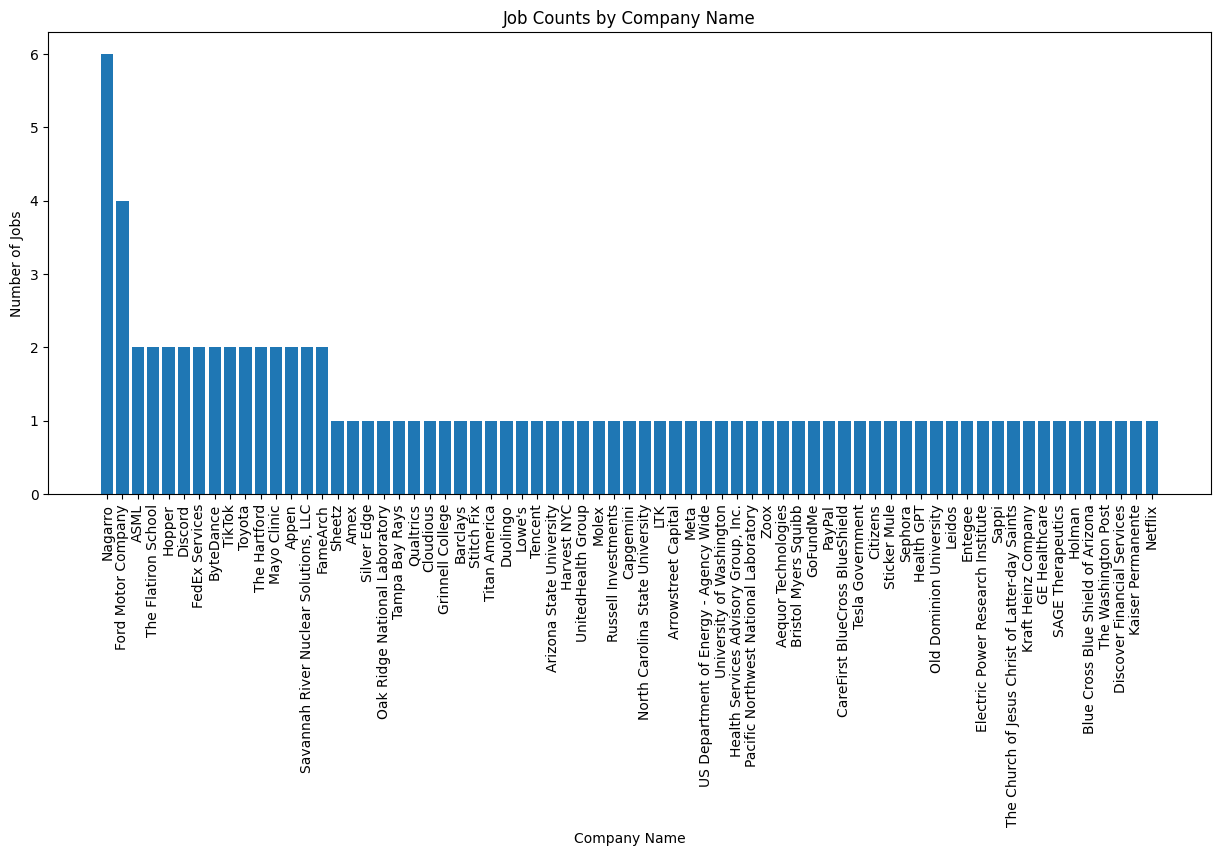

In [42]:
# Bar Plot of job counts by Company Name

job_counts = df_job_details['Company Name'].value_counts()
plt.figure(figsize=(15, 6))
plt.bar(job_counts.index, job_counts.values)
plt.xticks(rotation=90)
plt.title('Job Counts by Company Name')
plt.xlabel('Company Name')
plt.ylabel('Number of Jobs')
plt.show()

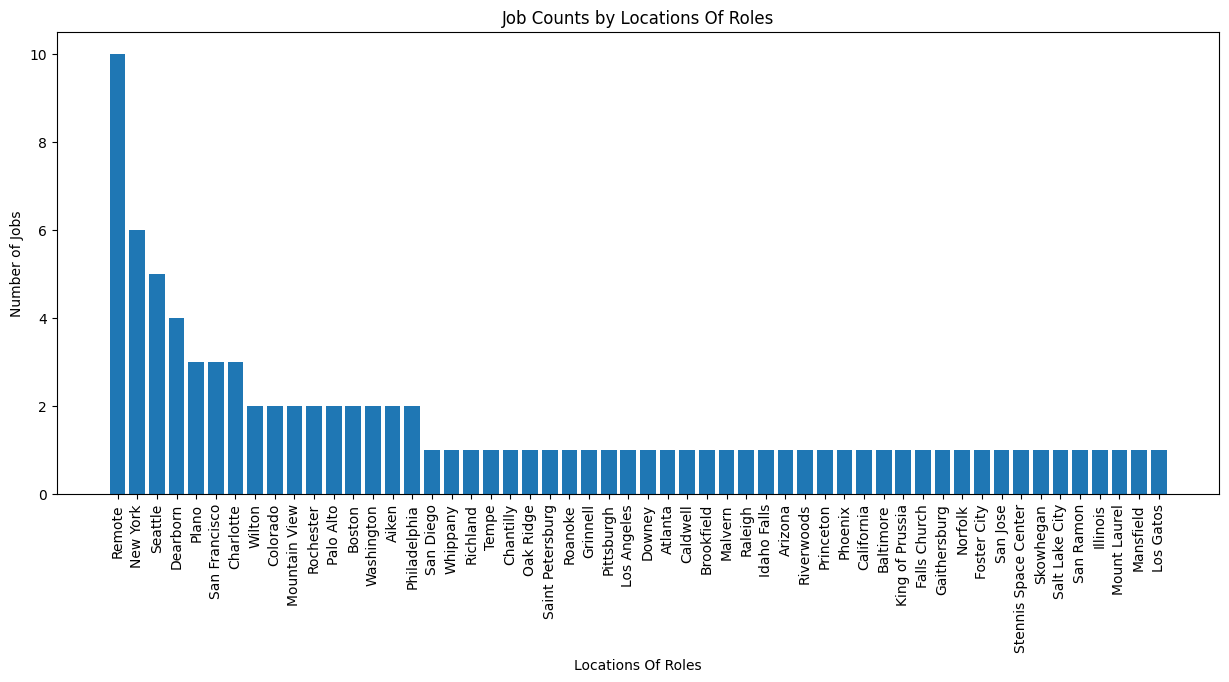

In [43]:
# Bar Plot of job counts by Locations Of Roles

job_counts = df_job_details['Locations Of Roles'].value_counts()
plt.figure(figsize=(15, 6))
plt.bar(job_counts.index, job_counts.values)
plt.xticks(rotation=90)
plt.title('Job Counts by Locations Of Roles')
plt.xlabel('Locations Of Roles')
plt.ylabel('Number of Jobs')
plt.show()

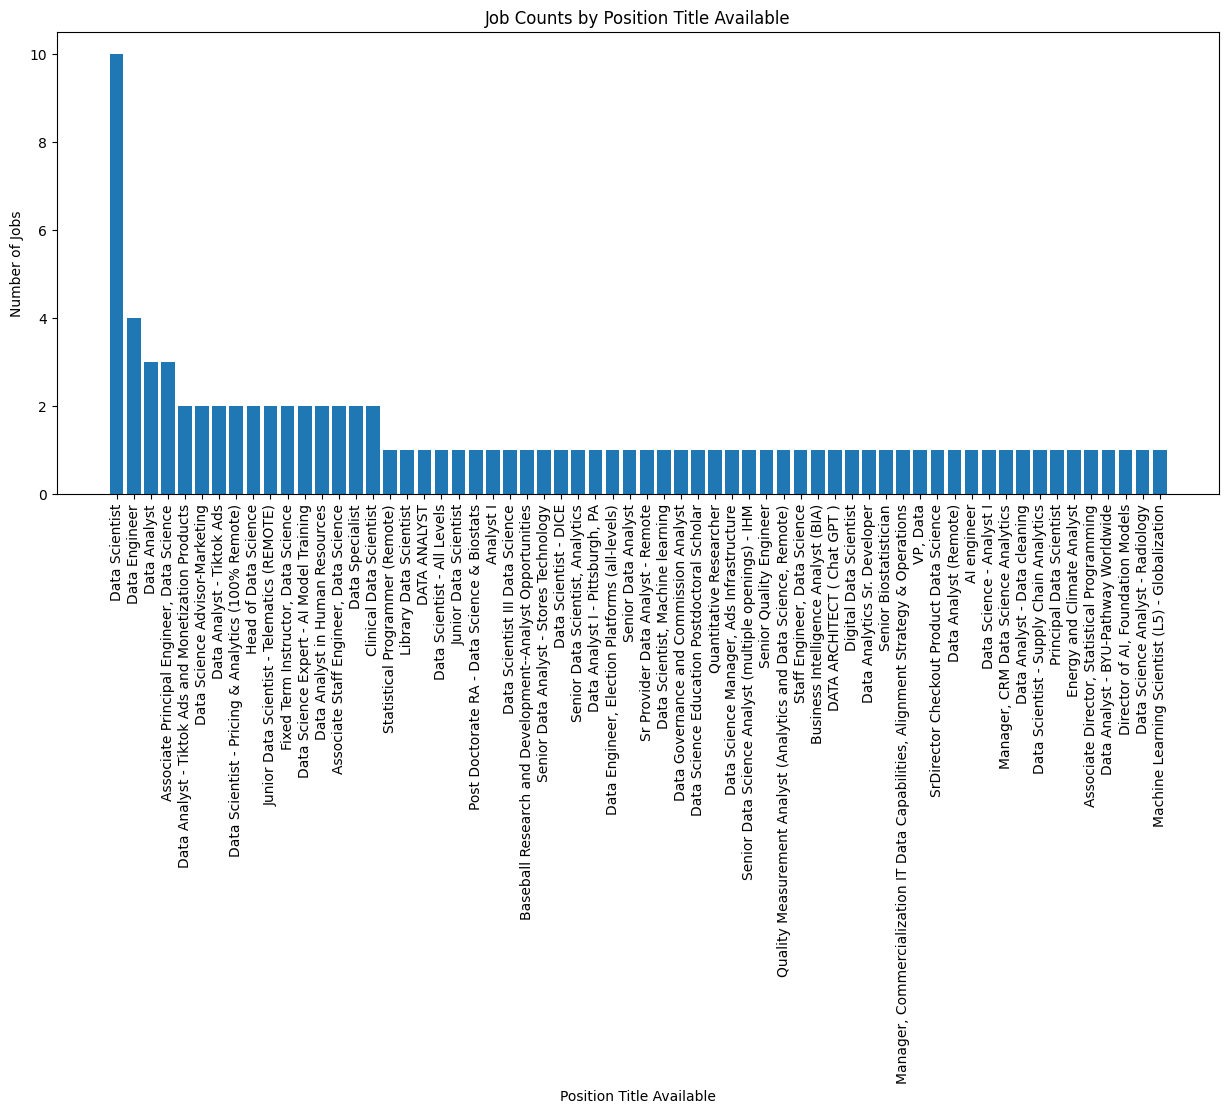

In [44]:
# Bar Plot of job counts by Position Title Available

job_counts = df_job_details['Position Title Available'].value_counts()
plt.figure(figsize=(15, 6))
plt.bar(job_counts.index, job_counts.values)
plt.xticks(rotation=90)
plt.title('Job Counts by Position Title Available')
plt.xlabel('Position Title Available')
plt.ylabel('Number of Jobs')
plt.show()

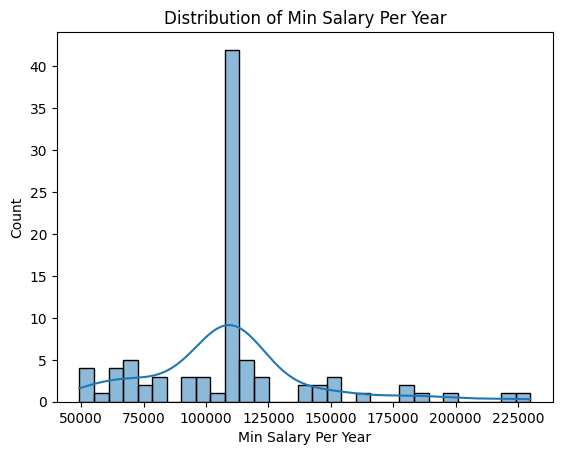

In [45]:
# Histogram of job counts by Min Salary Per Year

sns.histplot(data=df_job_details, x='Min Salary Per Year', kde=True)
plt.title('Distribution of Min Salary Per Year')
plt.xlabel('Min Salary Per Year')
plt.ylabel('Count')
plt.show()

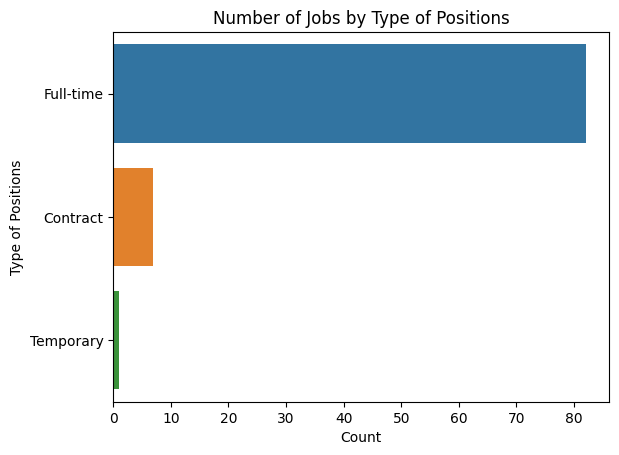

In [46]:
sns.countplot(data=df_job_details, y='Type Of Postions')
plt.title('Number of Jobs by Type of Positions')
plt.xlabel('Count')
plt.ylabel('Type of Positions')
plt.show()

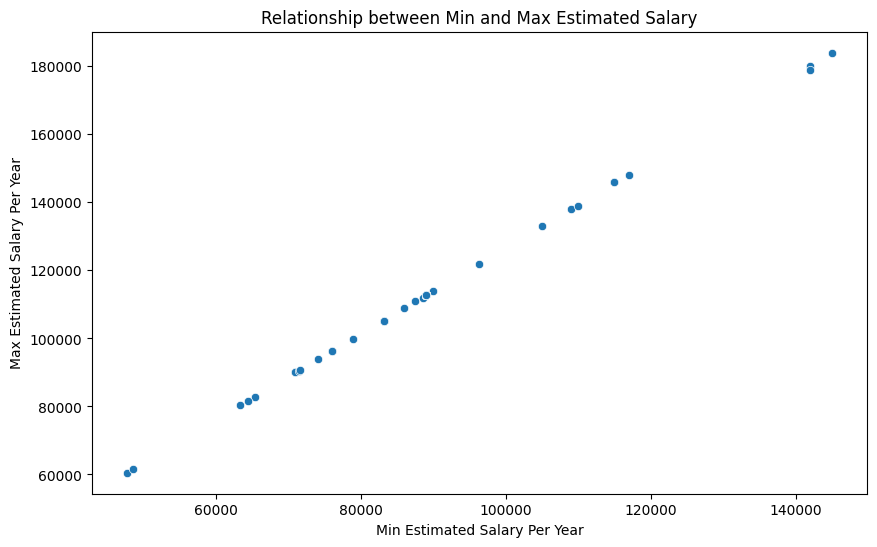

In [47]:
# Scatter plot of Minimum and Maximum Estimated Salary Per Year

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_job_details, x='Min Estimated Salary Per Year', y='Max Estimated Salary Per Year')
plt.title('Relationship between Min and Max Estimated Salary')
plt.xlabel('Min Estimated Salary Per Year')
plt.ylabel('Max Estimated Salary Per Year')
plt.show()

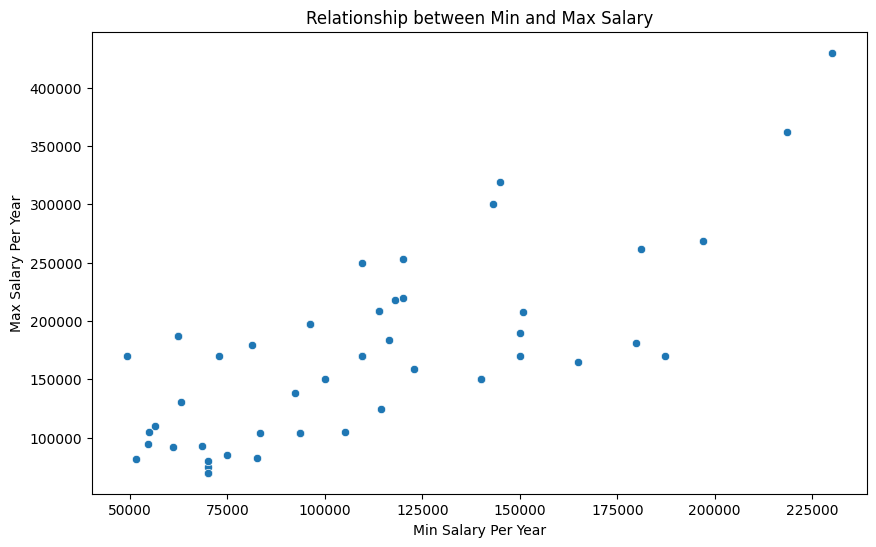

In [48]:
# Scatter plot of Minimum and Maximum Salary Salary Per Year

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_job_details, x='Min Salary Per Year', y='Max Salary Per Year')
plt.title('Relationship between Min and Max Salary')
plt.xlabel('Min Salary Per Year')
plt.ylabel('Max Salary Per Year')
plt.show()

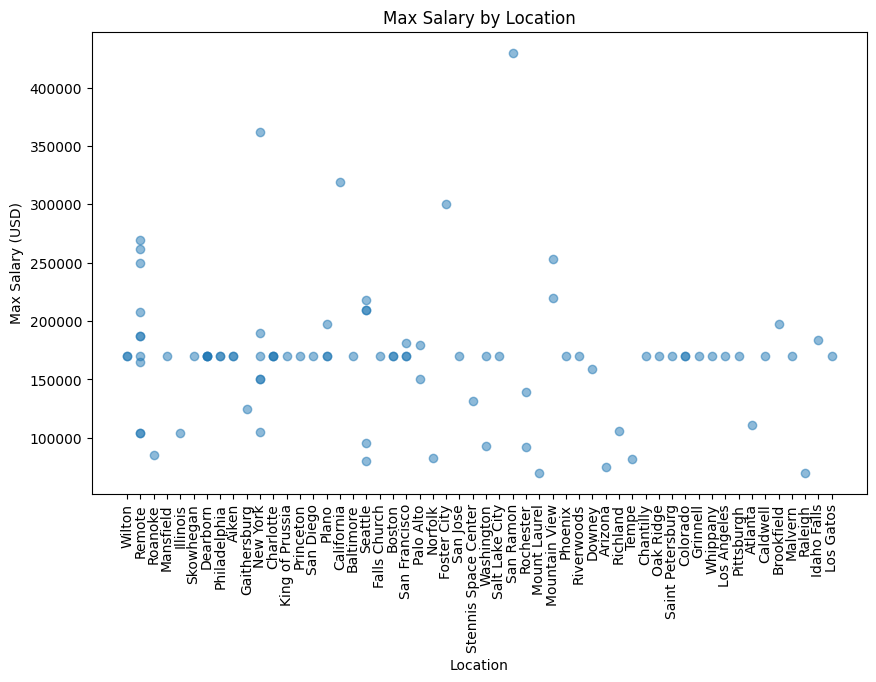

In [49]:
# Scatter plot of Locations Of Roles to Maximum Salary Salary Per Year

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df_job_details['Locations Of Roles'], df_job_details['Max Salary Per Year'], alpha=0.5)
plt.title('Max Salary by Location')
plt.xlabel('Location')
plt.ylabel('Max Salary (USD)')
plt.xticks(rotation=90)
plt.show()

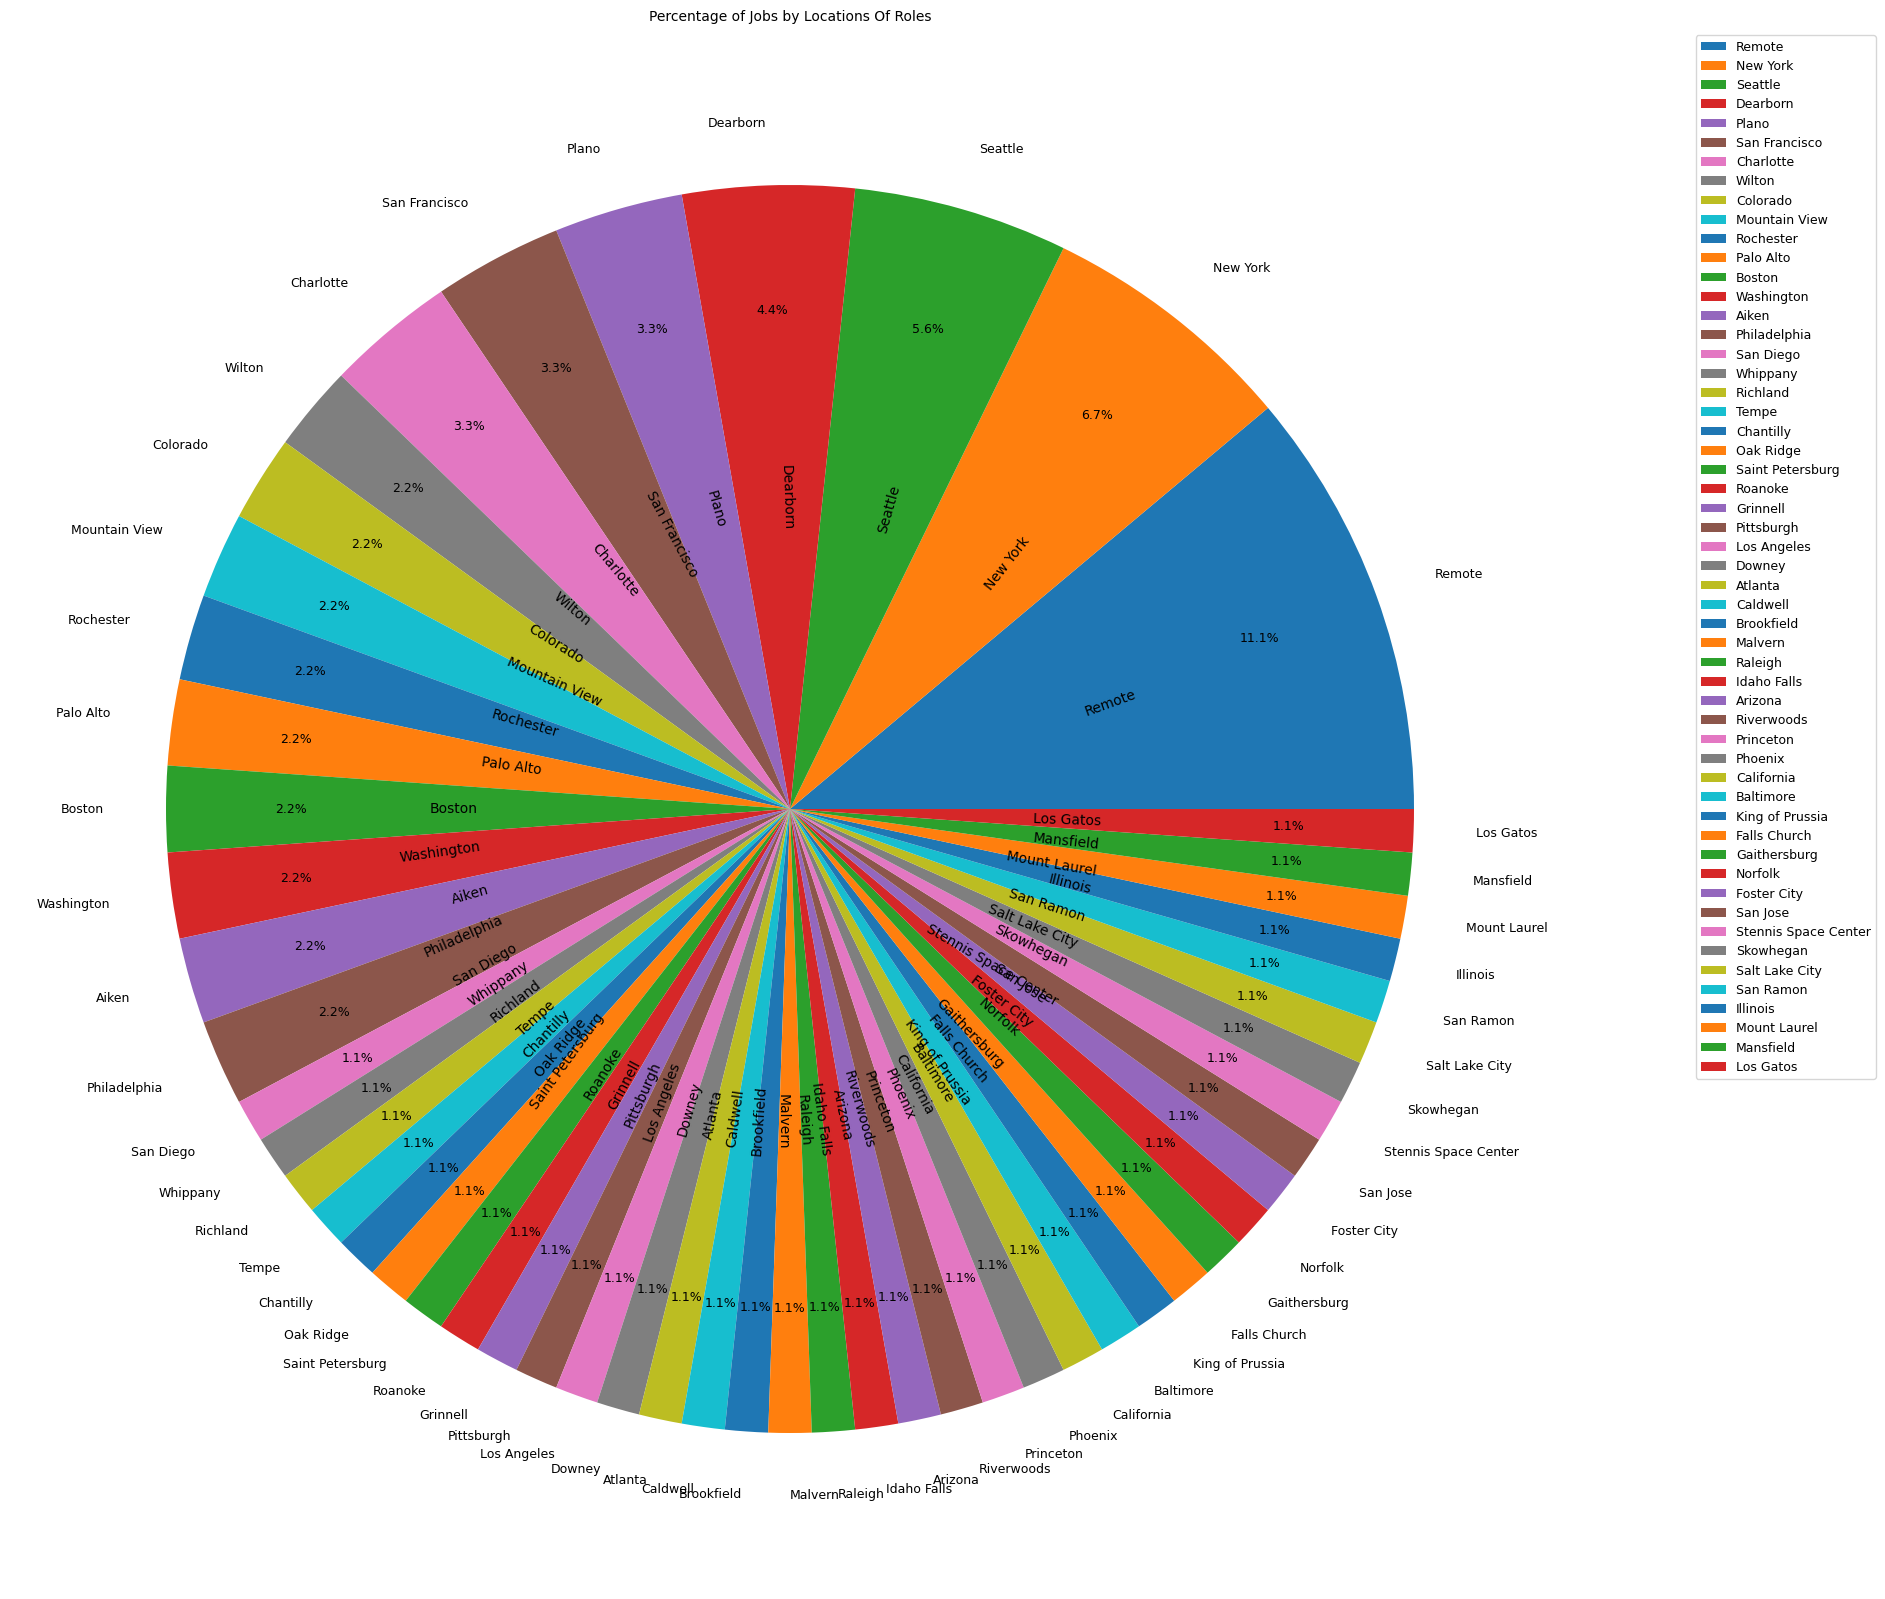

In [50]:
# Pie chart of job counts by Locations Of Roles
import numpy as np

location_counts = df_job_details['Locations Of Roles'].value_counts()
plt.figure(figsize=(25,20))
plt.pie(location_counts, labels=location_counts.index, autopct='%1.1f%%', textprops={'fontsize': 9}, pctdistance=0.8)
plt.title('Percentage of Jobs by Locations Of Roles', fontsize=10)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=9)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.gca().set_aspect('equal')
plt.gca().set_ylabel('')
plt.xticks(rotation=90)

# Getting the current axes of the plot
ax = plt.gca()

# For each pie wedge, use angle to shift the labels and add text
for index, wedge in enumerate(ax.patches):
    angle = (wedge.theta2 - wedge.theta1)/2. + wedge.theta1
    x = (wedge.r/2.)*np.cos(np.deg2rad(angle))
    y = (wedge.r/2.)*np.sin(np.deg2rad(angle))
    
    # If angle is greater than 180 degrees, add 180 to it to avoid upside-down labels
    if angle > 180:
        angle -= 180
        ha = 'right'
    else:
        ha = 'left'
    
    # If angle is greater than 90 degrees, add 180 to it to rotate text upright
    if angle > 90:
        angle += 180
    
    plt.text(x, y, location_counts.index[index], rotation=angle, ha=ha, va='center')
    
plt.show()

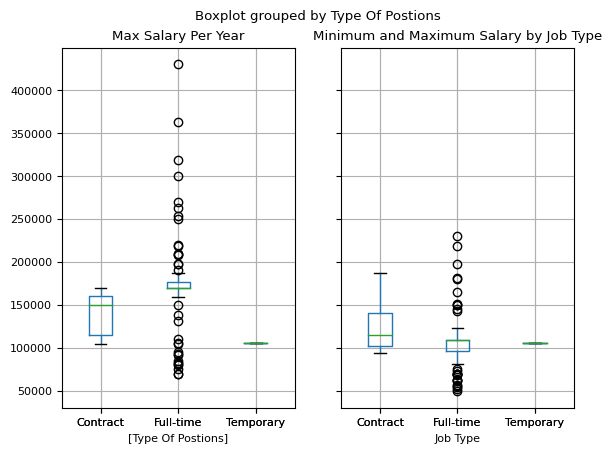

<Figure size 2000x1000 with 0 Axes>

In [51]:
#  Box plot of the minimum and maximum salary by job type
plt.rc('font', size=8)
df_job_details[['Type Of Postions', 'Min Salary Per Year', 'Max Salary Per Year']].boxplot(by='Type Of Postions')
plt.title('Minimum and Maximum Salary by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Salary (USD)')
plt.figure(figsize=(20,10))
plt.show()

In [52]:
df_job_details['Key Skills Required'].value_counts().head(10)

Company Description We're Nagarro. We are a digital product engineering company that is scaling in a big way! We build products, services, and experiences…          6
You're role will involve working on a range of projects to train generative AI models.\nEvaluation and ranking of responses based on accuracy, relevance and…        2
Expert experience pulling large and complex data using SQL and writing data pipelines.\nWork closely with key cross functional teams such as operations, product…    2
Demonstrated knowledge of SQL and the python data science stack.\nThis position requires basic knowledge of statistical or probabilistic modeling, data…             2
2+ years of practitioner experience as a data scientist, data analyst or data engineer.\nInstructors need to be comfortable guiding students through applied and…    2
Leveraging data to solve customer problems is in Hopper’s DNA.\nFind new opportunities for revenue growth by becoming the expert on our data and customers.          

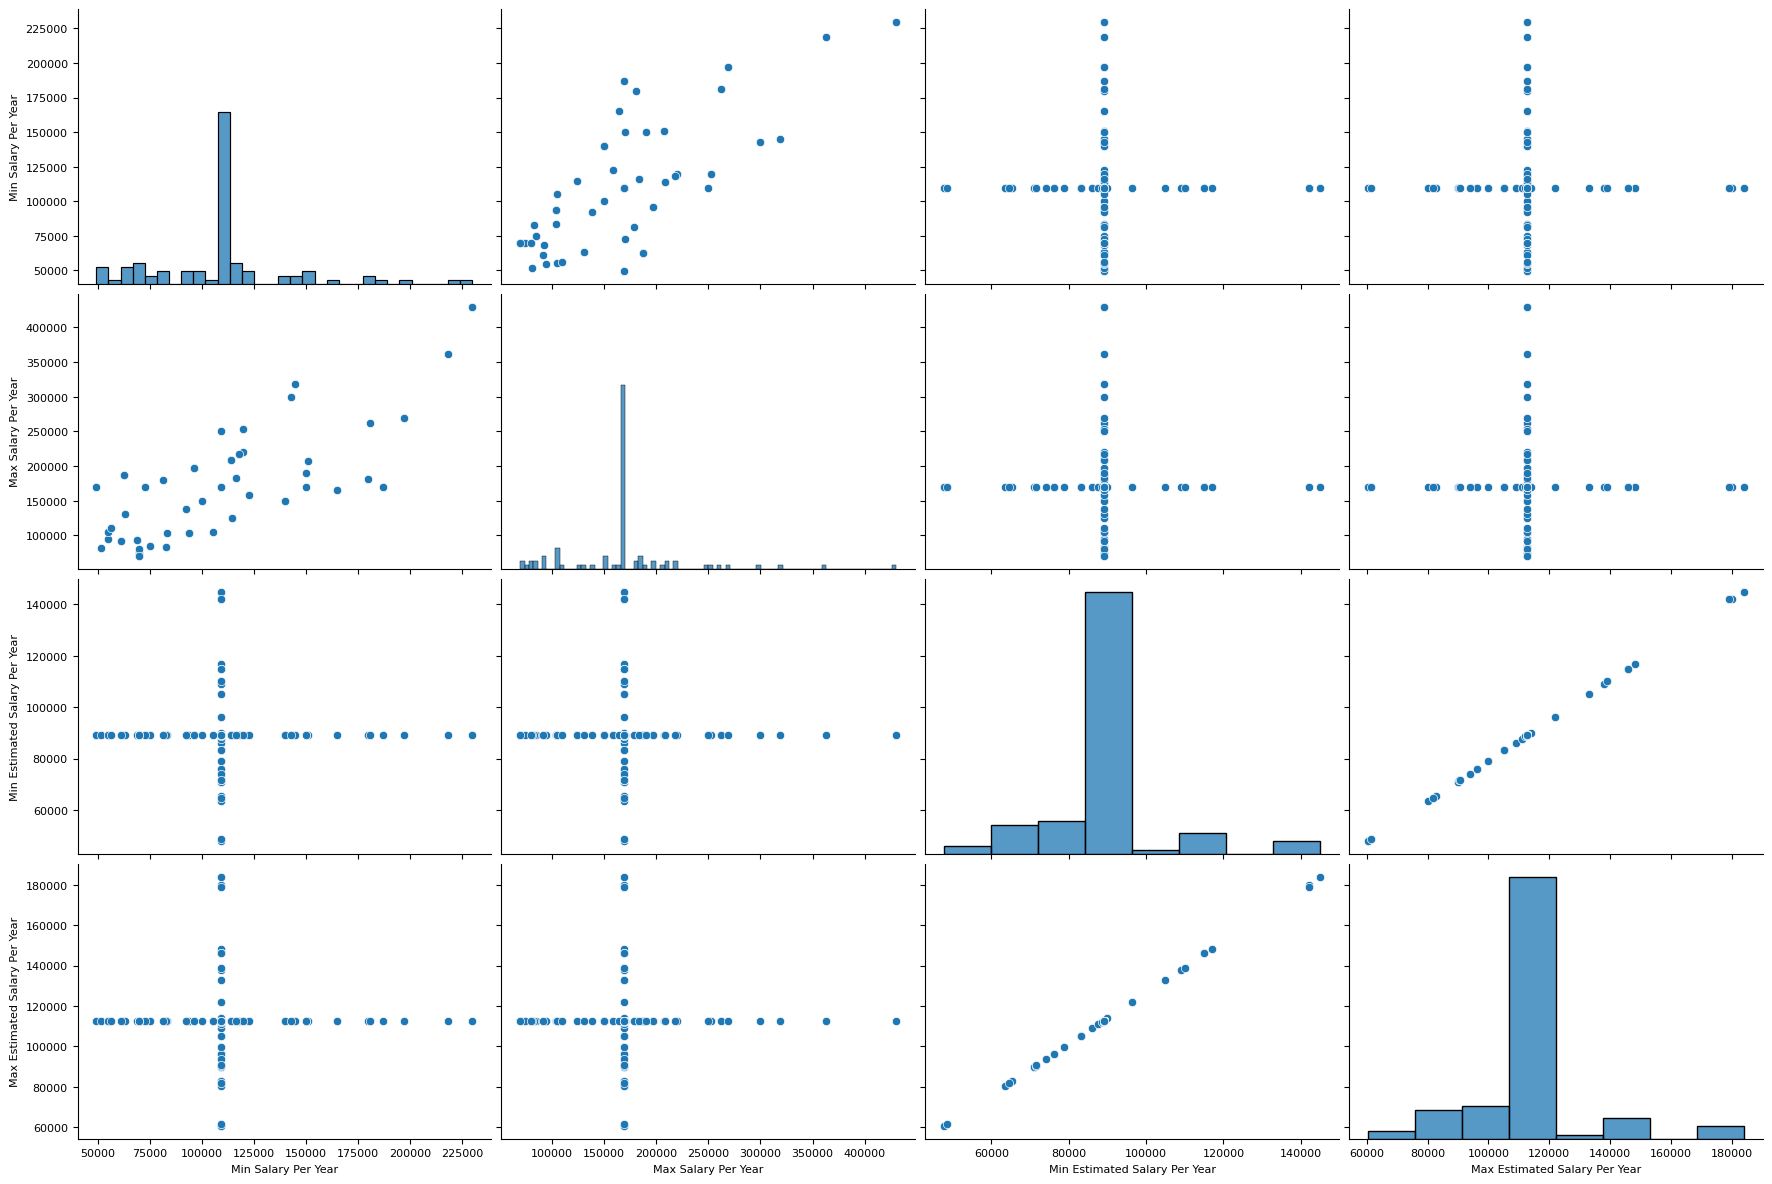

In [53]:
# Pair Plot of Min Salary Per Year, Max Salary Per Year, Min Estimated Salary Per Year and Max Estimated Salary Per Year

sns.pairplot(df_job_details[['Min Salary Per Year', 'Max Salary Per Year', 'Min Estimated Salary Per Year', 'Max Estimated Salary Per Year']], height=3, aspect=1.5)
plt.xticks(rotation=90)
plt.show()

In [54]:
import plotly.graph_objs as go

# Histogram of salaries
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_job_details['Min Salary Per Year'], name='Min Salary', opacity=0.7))
fig.add_trace(go.Histogram(x=df_job_details['Max Salary Per Year'], name='Max Salary', opacity=0.7))
fig.update_layout(barmode='overlay', title='Salary Distribution')
fig.show()


In [55]:
print(df_job_details["Locations Of Roles"].unique())

['Wilton' 'Remote' 'Roanoke' 'Mansfield' 'Illinois' 'Skowhegan' 'Dearborn'
 'Philadelphia' 'Aiken' 'Gaithersburg' 'New York' 'Charlotte'
 'King of Prussia' 'Princeton' 'San Diego' 'Plano' 'California'
 'Baltimore' 'Seattle' 'Falls Church' 'Boston' 'San Francisco' 'Palo Alto'
 'Norfolk' 'Foster City' 'San Jose' 'Stennis Space Center' 'Washington'
 'Salt Lake City' 'San Ramon' 'Rochester' 'Mount Laurel' 'Mountain View'
 'Phoenix' 'Riverwoods' 'Downey' 'Arizona' 'Richland' 'Tempe' 'Chantilly'
 'Oak Ridge' 'Saint Petersburg' 'Colorado' 'Grinnell' 'Whippany'
 'Los Angeles' 'Pittsburgh' 'Atlanta' 'Caldwell' 'Brookfield' 'Malvern'
 'Raleigh' 'Idaho Falls' 'Los Gatos']


In [56]:
df_job_details.columns

Index(['Company Name', 'Job ID', 'Location of Company',
       'Position Title Available', 'Locations Of Roles', 'Type Of Postions',
       'Key Skills Required', 'Min Salary Per Year', 'Max Salary Per Year',
       'Min Estimated Salary Per Year', 'Max Estimated Salary Per Year'],
      dtype='object')

In [57]:
# Finding longitudes and latitudes of the Location Of Roles to plot them in world map

from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_app")

def get_latitude(location):
    try:
        location = geolocator.geocode(location)
        return location.latitude
    except:
        return None

def get_longitude(location):
    try:
        location = geolocator.geocode(location)
        return location.longitude
    except:
        return None

df_job_details['Latitude'] = df_job_details['Locations Of Roles'].apply(get_latitude)
df_job_details['Longitude'] = df_job_details['Locations Of Roles'].apply(get_longitude)


In [58]:
# Plotting the Locations in the world map along with other details

import plotly.express as px

fig = px.scatter_mapbox(df_job_details, lat="Latitude", lon="Longitude", hover_name="Position Title Available",
                        hover_data=["Company Name", "Min Salary Per Year", "Max Salary Per Year", "Locations Of Roles", "Type Of Postions", "Key Skills Required"],
                        zoom=3, height=500)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title="Job Locations")
fig.show()

In [59]:
# Plotting the Locations in the US map along with other details

import plotly.express as px

fig = px.scatter_mapbox(df_job_details, lat="Latitude", lon="Longitude", hover_name="Position Title Available",
                        hover_data=["Company Name", "Min Salary Per Year", "Max Salary Per Year", "Locations Of Roles", "Type Of Postions", "Key Skills Required"],
                        zoom=3, height=500)

fig.update_layout(mapbox_style="carto-positron", mapbox_zoom=3, mapbox_center={"lat": 37.0902, "lon": -95.7129})
fig.update_layout(title="Job Locations")
fig.show()

In [60]:
# Scatter plot of location and salary

fig2 = px.scatter(df_job_details, x='Longitude', y='Latitude', color='Min Salary Per Year',
                  hover_name='Position Title Available')
fig2.update_layout(title='Location and Salary')
fig2.show()

###3) Your ideal job (job title and relevant skills required) ( 2 Marks )

In [61]:
from termcolor import colored

# calculate the average salary for each job title
avg_salary = df_job_details.groupby('Position Title Available')['Min Salary Per Year'].mean()

# find the job title with the highest average salary
ideal_job_title = avg_salary.idxmax()

# find the skills required for the ideal job
ideal_job_skills = df_job_details[df_job_details['Position Title Available'] == ideal_job_title]['Key Skills Required'].iloc[0]

# create a bar chart to visualize the average salaries
fig = go.Figure()
fig.add_trace(go.Bar(x=avg_salary.index, y=avg_salary.values))
fig.update_layout(title="Average Salaries by Job Title", xaxis_title="Job Title", yaxis_title="Average Salary (per year)")
fig.show()

In [62]:
# print the results

print(colored("Ideal job title:", "blue", attrs=["bold"]))
print(colored(ideal_job_title, "green", attrs=["bold"]))
print(colored("\nRelevant skills required:", "blue", attrs=["bold"]))
print(colored(ideal_job_skills, "green"))

Ideal job title:
Director of AI, Foundation Models

Relevant skills required:
Experience with high-dimensional imaging data and waveform/time-series data.
6+ years of working experience as a data scientist.


In [63]:
df_job_details.to_csv('job_details.csv', index=False)

#PART B ( 35 Marks )

## Project 2 : Using web scraping to build a database of movie related information from: The Movie Database (TMDB) movie data

### Problem statement:

A common business requirement in the context of information gathering is to extract and filter relevant data from web pages that host this information. However, access to information spread over several web pages, hosted potentially on multiple websites is a cumbersome process and we cannot rely on manual procedures to execute this task. In this project, you will employ a
programmatic approach to access, parse and extract relevant information from a website of interest.

### Objective:

The project's goal is to extract data (from a chosen number of pages) from The Movie Database website (https://www.themoviedb.org/) into a tabular data format so that further analysis (e.g., details about a movie's genre, cast, and user rating) can be facilitated. To execute this project, you will have to read the documentation links provided against each task in the assignment and adapt the code examples provided in the documentation for the task at hand

### Pre-requisites :

#### Tools: Jupyter Notebook or Google Colab or Microsoft Visual Studio IDE
#### Languages: Python, HTML
#### Libraries: requests, beautifulSoup, pandas

## Task Questions (35 Marks)

### 1. Establish a connection to the webpage - "https://www.themoviedb.org/movie" - and provide the following details ( 4 marks )

a. Import the requests library (https://requests.readthedocs.io/en/latest/ ) and formulate a get request to download the contents of the webpage ( "https://www.themoviedb.org/movie" ) ( 1 mark )

In order to get access to the URL 

In [64]:
import requests

url = "https://www.themoviedb.org/movie"
username = "surajit4"
password = "surajit4"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
}

response = requests.get(url, auth=(username, password), headers=headers)

print(response.content)

b'<!DOCTYPE html>\n<html lang="en" class="no-js">\n  <head>\n    <title>Popular Movies &#8212; The Movie Database (TMDB)</title>\n    <meta http-equiv="cleartype" content="on">\n    <meta charset="utf-8">\n    <meta name="keywords" content="Movies, TV Shows, Streaming, Reviews, API, Actors, Actresses, Photos, User Ratings, Synopsis, Trailers, Teasers, Credits, Cast">\n    <meta name="mobile-web-app-capable" content="yes">\n    <meta name="apple-mobile-web-app-capable" content="yes">\n    <meta name="viewport" content="width=device-width,initial-scale=1">\n      <meta name="description" content="The Movie Database (TMDB) is a popular, user editable database for movies and TV shows.">\n    <meta name="msapplication-TileImage" content="/assets/2/v4/icons/mstile-144x144-30e7905a8315a080978ad6aeb71c69222b72c2f75d26dab1224173a96fecc962.png">\n<meta name="msapplication-TileColor" content="#032541">\n<meta name="theme-color" content="#032541">\n<link rel="apple-touch-icon" sizes="180x180" href

b. Verify the status code of the request and confirm that the request was executed
appropriately (https://requests.readthedocs.io/en/latest/user/quickstart/#response-status-code) ( 1 mark )

In [65]:
# Check the status code of the response
if response.status_code == 200:
    print("The request was executed appropriately. Status code:", response.status_code)
else:
    print("The request was not executed appropriately. Status code:", response.status_code)

The request was executed appropriately. Status code: 200


c. Print the contents of the page obtained from the response and save it in a
variable (https://requests.readthedocs.io/en/latest/user/quickstart/#response-content) ( 1 mark )

In [66]:
# Print the content of the response
content = response.content
print(content)

b'<!DOCTYPE html>\n<html lang="en" class="no-js">\n  <head>\n    <title>Popular Movies &#8212; The Movie Database (TMDB)</title>\n    <meta http-equiv="cleartype" content="on">\n    <meta charset="utf-8">\n    <meta name="keywords" content="Movies, TV Shows, Streaming, Reviews, API, Actors, Actresses, Photos, User Ratings, Synopsis, Trailers, Teasers, Credits, Cast">\n    <meta name="mobile-web-app-capable" content="yes">\n    <meta name="apple-mobile-web-app-capable" content="yes">\n    <meta name="viewport" content="width=device-width,initial-scale=1">\n      <meta name="description" content="The Movie Database (TMDB) is a popular, user editable database for movies and TV shows.">\n    <meta name="msapplication-TileImage" content="/assets/2/v4/icons/mstile-144x144-30e7905a8315a080978ad6aeb71c69222b72c2f75d26dab1224173a96fecc962.png">\n<meta name="msapplication-TileColor" content="#032541">\n<meta name="theme-color" content="#032541">\n<link rel="apple-touch-icon" sizes="180x180" href

d. Infer the type of the variable created in part 1c and display the first 200
characters of the content from the server’s response ( 1 Mark )

In [67]:
# Infer the type of the variable created in part 1c
print("Type of the variable 'content':", type(content))

# Display the first 200 characters of the content
print("First 200 characters of the content from the server’s response:\n", content[:200])

Type of the variable 'content': <class 'bytes'>
First 200 characters of the content from the server’s response:
 b'<!DOCTYPE html>\n<html lang="en" class="no-js">\n  <head>\n    <title>Popular Movies &#8212; The Movie Database (TMDB)</title>\n    <meta http-equiv="cleartype" content="on">\n    <meta charset="utf-8">\n  '


###2. Parse the content of HTML response using the BeautifulSoup library and execute the tasks specified in the guidelines mentioned below ( 6 marks )

a. From the BeautifulSoup library (bs4) import the BeautifulSoup class. Pass the
contents of the webpage obtained from step 1c as an argument to create an
instance of the BeautifulSoup class ( 2 Marks ) 
Hint : Use “ html.parser ” as another argument of the BeautifulSoup constructor
function (https://www.crummy.com/software/BeautifulSoup/bs4/doc/#making-the-soup)

In [68]:
from bs4 import BeautifulSoup

In [69]:
# Step 2a - Creating an instance of the BeautifulSoup class
soup = BeautifulSoup(response.content, "html.parser")

b. Extract the title of the parsed web page content using an appropriate method or attribute of the document object created in part 2a (https://www.crummy.com/software/BeautifulSoup/bs4/doc/#navigating-using-tagnames) ( 1 Mark )

In [70]:
# Step 2b - Extracting the title of the parsed web page content

title = soup.find('title')
if title is not None:
    print(title.string)
else:
    print("No title tag found in the web page content")

title = soup.title.string
print("Title of the webpage:", title)

Popular Movies — The Movie Database (TMDB)
Title of the webpage: Popular Movies — The Movie Database (TMDB)


c. Write an user defined function to generalize the task presented in Q2a to any URL. Your function should take a URL string as an input and return a correctly formulated BeautifulSoup instance as the output. In your function definition, ensure that appropriate exceptions are raised to the user (through status codes) if they pass in malformed/incorrect URLs. Write two test cases for your function - one with a working URL and another with an URL that gets a 404 response. ( 3 marks )

In [71]:
# Step 2c - Write a function to generalize the task presented in Q2a to any URL
def get_soup(url):
    try:
        username = "surajit4"
        password = "surajit4"
        headers = {
          "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
        }
        response = requests.get(url, auth=(username, password), headers=headers)
        response.raise_for_status()  # raise an HTTPError for status codes above 400
        soup = BeautifulSoup(response.content, 'html.parser')
        return soup
    except requests.exceptions.HTTPError as e:
        print("HTTP Error:", e)
    except requests.exceptions.RequestException as e:
        print("Request Error:", e)

# Test case 1 - valid URL
soup1 = get_soup("https://www.themoviedb.org/movie")
print("Test case 1 Title:", soup1.title.string)

# Test case 2 - invalid URL
soup2 = get_soup("https://www.themoviedb.org/movie123")
print("Test case 2 Title:", soup2)

Test case 1 Title: Popular Movies — The Movie Database (TMDB)
HTTP Error: 404 Client Error: Not Found for url: https://www.themoviedb.org/movie123
Test case 2 Title: None


###3. Extract the content of the webpage - https://www.themoviedb.org/movie - that hosts a current dated listing of popular movies. ( 5 Marks )

a. Write a function call to the user defined function created in 2c with the url https://www.themoviedb.org/movie as an input and store the response in a variable ( 1 marks )

In [72]:
url = "https://www.themoviedb.org/movie"
soup = get_soup(url)

Apply appropriate methods from the BeautifulSoup library (https://www.crummy.com/software/BeautifulSoup/bs4/doc/#making-the-soup) on the variable created in part 3a to answer the following questions:

b. Print the HTML content associated with the first movie displayed on the web page using appropriate HTML tags to access this listing on the object created in
part 3a ( 1 marks )

In [73]:
first_movie = soup.find('div', {'class': 'wrapper'}).find('a')
print(first_movie)

<a class="image" href="/movie/640146" title="Ant-Man and the Wasp: Quantumania">
<img alt="" class="poster" loading="lazy" src="/t/p/w220_and_h330_face/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg" srcset="/t/p/w220_and_h330_face/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg 1x, /t/p/w440_and_h660_face/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg 2x"/>
</a>


c. Display the name of the first movie using appropriate HTML tags to access this listing on the object created in part 3a ( 1 marks )

In [74]:
movie_tag = soup.find('div', {'class': 'wrapper'}).find('a', {'class': 'image'})
  
# get the title attribute of the anchor tag
title = movie_tag.get('title')

# print the title
print(title)

Ant-Man and the Wasp: Quantumania


d. Display the user rating of the first movie by using appropriate HTML tags to access this listing on the object created in part 3a (1 marks )

In [75]:
movie_div = soup.find('div', class_='card style_1')
user_score_chart_div = movie_div.find('div', class_='user_score_chart')
percent = user_score_chart_div.get('data-percent')
print("User rating for the first movie is:", percent,'%')

User rating for the first movie is: 66.0 %


e. For the first movie, extract the part of the url following the string “https://www.themoviedb.org/” using the appropriate HTML tags to extract this portion on the object created in part 3a (do not use built-in string methods). (1 marks )
For example, if the first movie on the web page had the URL https://www.themoviedb.org/movie/779782 “ your output should be movie/779782

*Hint : Use F12 key ( Console ) in google chrome browser to get the details on HTML components ( such as tags, classes ) of a webpage. This method of “inspecting” HTML components of interest is widely used by front end developers. Refer to the support documentation attached with this project for further information*

In [76]:
first_movie_url = soup.find('a', {'class': 'image'})['href']
print(first_movie_url)
required_part = first_movie_url.replace('https://www.themoviedb.org/', '')
print(required_part)

/movie/640146
/movie/640146


### 4. Write user defined functions for each subsection below (i.e., Q4 a,b,c,d, and e) to return ( 10 marks )

a. Titles of all the movies on the page as a Python list (2 marks )

In [77]:
def get_movie_titles(response):
    titles = []
    for movie in response.find_all('div', class_='wrapper'):
        image = movie.find('a', class_="image")
        title = image.get('title')
        titles.append(title)
    return titles
response_titles = get_movie_titles(soup)
response_titles

['Ant-Man and the Wasp: Quantumania',
 "The Pope's Exorcist",
 'The Super Mario Bros. Movie',
 'Guardians of the Galaxy Vol. 3',
 'Evil Dead Rise',
 'Ghosted',
 'Shazam! Fury of the Gods',
 'AKA',
 'Avatar: The Way of Water',
 'Creed III',
 'Scream VI',
 'The Last Kingdom: Seven Kings Must Die',
 'Dungeons & Dragons: Honor Among Thieves',
 'Peter Pan & Wendy',
 'John Wick: Chapter 4',
 'Puss in Boots: The Last Wish',
 'Murder Mystery 2',
 'Fast X',
 'Clock',
 'Assassin Club']

b. User ratings of all the movies on the page as a Python list (2 marks )

In [78]:
def get_movie_ratings(response):
    ratings = []
    for movie in response.find_all('div', class_='card style_1'):
        user_score_chart_div = movie.find('div', class_='user_score_chart')
        rating = user_score_chart_div.get('data-percent')
        if rating is not None:
            rating = rating + '%'
        else:
            rating = "not rated"
        ratings.append(rating)
    return ratings
response_ratings = get_movie_ratings(soup)
response_ratings

['66.0%',
 '74.0%',
 '75.0%',
 '83.0%',
 '72.0%',
 '71.0%',
 '68.0%',
 '71.0%',
 '77.0%',
 '73.0%',
 '73.0%',
 '73.0%',
 '75.0%',
 '59.0%',
 '79.0%',
 '83.0%',
 '66.0%',
 '0%',
 '59.0%',
 '71.0%']

c. HTML content of all the individual pages of movies collected into a Python list. ( 2 marks )

*(Hint : For each of the movies listed on the page, extract the end url as obtained in q3e)*

In [79]:
def get_movie_end_url(response):
    movie_links = response.find_all('a', {'class': 'image'})
    movie_end_urls = [link['href'] for link in movie_links]
    return movie_end_urls

movie_end_url = get_movie_end_url(soup)
movie_end_url

['/movie/640146',
 '/movie/758323',
 '/movie/502356',
 '/movie/447365',
 '/movie/713704',
 '/movie/868759',
 '/movie/594767',
 '/movie/1102776',
 '/movie/76600',
 '/movie/677179',
 '/movie/934433',
 '/movie/948713',
 '/movie/493529',
 '/movie/420808',
 '/movie/603692',
 '/movie/315162',
 '/movie/638974',
 '/movie/385687',
 '/movie/1085103',
 '/movie/876969']

In [80]:
def get_movie_html_pages(response):
    base_url = 'https://www.themoviedb.org'
    movie_links = response.find_all('a', {'class': 'image'})
    movie_urls = [base_url + link['href'] for link in movie_links]

    html_pages = []
    username = "surajit4"
    password = "surajit4"
    headers = {
      "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
    }
    for url in movie_urls:
        html = requests.get(url, auth=(username, password), headers=headers).content
        html_soup = BeautifulSoup(html, "html.parser")
        html_pages.append(html_soup)

    return html_pages

html_pages = get_movie_html_pages(soup)

In [81]:
html_pages

[<!DOCTYPE html>
 
 <html class="no-js" lang="en">
 <head>
 <title>Ant-Man and the Wasp: Quantumania (2023) — The Movie Database (TMDB)</title>
 <meta content="on" http-equiv="cleartype"/>
 <meta charset="utf-8"/>
 <meta content="Movies, TV Shows, Streaming, Reviews, API, Actors, Actresses, Photos, User Ratings, Synopsis, Trailers, Teasers, Credits, Cast" name="keywords"/>
 <meta content="yes" name="mobile-web-app-capable"/>
 <meta content="yes" name="apple-mobile-web-app-capable"/>
 <meta content="width=device-width,initial-scale=1" name="viewport"/>
 <meta content="Super-Hero partners Scott Lang and Hope van Dyne, along with with Hope's parents Janet van Dyne and Hank Pym, and Scott's daughter Cassie Lang, find themselves exploring the Quantum Realm, interacting with strange new creatures and embarking on an adventure that will push them beyond the limits of what they thought possible." name="description"/>
 <meta content="/assets/2/v4/icons/mstile-144x144-30e7905a8315a080978ad6aeb71

d. Genres of all the movies on the page as a Python list ( 2 marks )

In [82]:
def get_movie_genres(html_pages):
    genres_list = []
    for page in html_pages:
        genres = page.find('span', class_='genres').find_all('a')[:]
        genres = [genre.text for genre in genres]
        genres_list.append(genres)
    for i in range(len(genres_list)):
      genres_list[i] = ", ".join(genres_list[i])
    return genres_list

movie_genres = get_movie_genres(html_pages)
movie_genres

['Action, Adventure, Science Fiction',
 'Horror, Mystery, Thriller',
 'Animation, Adventure, Family, Fantasy, Comedy',
 'Science Fiction, Adventure, Action',
 'Horror, Thriller',
 'Action, Comedy, Romance',
 'Action, Comedy, Fantasy, Adventure',
 'Thriller, Action, Crime',
 'Science Fiction, Adventure, Action',
 'Drama, Action',
 'Horror, Mystery, Thriller',
 'Action, Adventure, History, Drama, War',
 'Adventure, Fantasy, Comedy',
 'Family, Fantasy, Action, Adventure',
 'Action, Thriller, Crime',
 'Animation, Family, Fantasy, Adventure, Comedy, Drama',
 'Comedy, Crime',
 'Action, Crime, Thriller',
 'Horror, Mystery, Thriller',
 'Action, Thriller']

e. Cast of all the movies on the page as a Python list ( 2 marks )

In [83]:
def get_movie_cast(html_pages):
    cast_list = []
    for page in html_pages:
        ol = page.find('ol', class_='people scroller')
        li_tags = ol.find_all("li", class_="card")
        cast_list_temp = []
        for character in li_tags:
          character_tag = character.find('p', class_="character")
          actor_name = character_tag.find_previous_sibling('p').text
          cast_list_temp.append(actor_name)
        cast_list.append(cast_list_temp)
    for i in range(len(cast_list)):
      cast_list[i] = ", ".join(cast_list[i])
    return cast_list

movie_cast = get_movie_cast(html_pages)
movie_cast

['Paul Rudd, Evangeline Lilly, Jonathan Majors, Kathryn Newton, Michelle Pfeiffer, Michael Douglas, Corey Stoll, Bill Murray, William Jackson Harper',
 "Russell Crowe, Daniel Zovatto, Alex Essoe, Franco Nero, Peter DeSouza-Feighoney, Laurel Marsden, Cornell John, Ryan O'Grady, Bianca Bardoe",
 'Chris Pratt, Charlie Day, Anya Taylor-Joy, Jack Black, Keegan-Michael Key, Seth Rogen, Fred Armisen, Khary Payton, Sebastian Maniscalco',
 'Chris Pratt, Zoe Saldaña, Bradley Cooper, Dave Bautista, Karen Gillan, Pom Klementieff, Vin Diesel, Sean Gunn, Chukwudi Iwuji',
 'Lily Sullivan, Alyssa Sutherland, Morgan Davies, Gabrielle Echols, Nell Fisher, Anna-Maree Thomas, Mirabai Pease, Richard Crouchley, Jayden Daniels',
 'Chris Evans, Ana de Armas, Adrien Brody, Mike Moh, Amy Sedaris, Tate Donovan, Tim Blake Nelson, Marwan Kenzari, Anna Deavere Smith',
 'Zachary Levi, Asher Angel, Jack Dylan Grazer, Adam Brody, Grace Caroline Currey, Helen Mirren, Lucy Liu, Rachel Zegler, Meagan Good',
 'Alban Lenoi

### 5. Write an user defined function that returns a pandas data frame with following data: ( 5marks )

a. Titles of the movies listed on the page

b. User ratings of the movies listed on the page

c. Genres of the movies listed on the page

d. Cast of the movies listed on the page

*Hint : The above information can be obtained by making function calls to the user defined functions in Q4a,b,d,e*

Note:
Input to the user defined function :

*   The response object created in Q3a
*   The list output from Q4c

In [84]:
import pandas as pd

def get_movie_data(response):
    titles = get_movie_titles(response)
    ratings = get_movie_ratings(response)
    genres = get_movie_genres(html_pages)
    cast = get_movie_cast(html_pages)
    
    # create a pandas dataframe with the extracted data
    movie_data = pd.DataFrame({
        'Title': titles,
        'Users Rating': ratings,
        'Genres': genres,
        'Cast': cast
    })
    
    movie_data = movie_data.reset_index(drop=True)
    movie_data.index = movie_data.index + 1
    return movie_data

In [85]:
movie_data = get_movie_data(soup)
movie_data

Title Users Rating  \
1         Ant-Man and the Wasp: Quantumania        66.0%   
2                       The Pope's Exorcist        74.0%   
3               The Super Mario Bros. Movie        75.0%   
4            Guardians of the Galaxy Vol. 3        83.0%   
5                            Evil Dead Rise        72.0%   
6                                   Ghosted        71.0%   
7                  Shazam! Fury of the Gods        68.0%   
8                                       AKA        71.0%   
9                  Avatar: The Way of Water        77.0%   
10                                Creed III        73.0%   
11                                Scream VI        73.0%   
12   The Last Kingdom: Seven Kings Must Die        73.0%   
13  Dungeons & Dragons: Honor Among Thieves        75.0%   
14                        Peter Pan & Wendy        59.0%   
15                     John Wick: Chapter 4        79.0%   
16             Puss in Boots: The Last Wish        83.0%   
17                         Murder Mystery 2        66.0%   
18                                   Fast X           0%   
19                                    Clock        59.0%   
20                            Assassin Club        71.0%   

                                               Genres  \
1                  Action, Adventure, Science Fiction   
2                           Horror, Mystery, Thriller   
3       Animation, Adventure, Family, Fantasy, Comedy   
4                  Science Fiction, Adventure, Action   
5                                    Horror, Thriller   
6                             Action, Comedy, Romance   
7                  Action, Comedy, Fantasy, Adventure   
8                             Thriller, Action, Crime   
9                  Science Fiction, Adventure, Action   
10                                      Drama, Action   
11                          Horror, Mystery, Thriller   
12             Action, Adventure, History, Drama, War   
13                         Adventure, Fantasy, Comedy   
14                 Family, Fantasy, Action, Adventure   
15                            Action, Thriller, Crime   
16  Animation, Family, Fantasy, Adventure, Comedy,...   
17                                      Comedy, Crime   
18                            Action, Crime, Thriller   
19                          Horror, Mystery, Thriller   
20                                   Action, Thriller   

                                                 Cast  
1   Paul Rudd, Evangeline Lilly, Jonathan Majors, ...  
2   Russell Crowe, Daniel Zovatto, Alex Essoe, Fra...  
3   Chris Pratt, Charlie Day, Anya Taylor-Joy, Jac...  
4   Chris Pratt, Zoe Saldaña, Bradley Cooper, Dave...  
5   Lily Sullivan, Alyssa Sutherland, Morgan Davie...  
6   Chris Evans, Ana de Armas, Adrien Brody, Mike ...  
7   Zachary Levi, Asher Angel, Jack Dylan Grazer, ...  
8   Alban Lenoir, Éric Cantona, Thibault de Montal...  
9   Sam Worthington, Zoe Saldaña, Sigourney Weaver...  
10  Michael B. Jordan, Tessa Thompson, Jonathan Ma...  
11  Melissa Barrera, Jenna Ortega, Jasmin Savoy Br...  
12  Alexander Dreymon, Mark Rowley, Arnas Fedaravi...  
13  Chris Pine, Michelle Rodriguez, Justice Smith,...  
14  Alexander Molony, Ever Anderson, Jude Law, Aly...  
15  Keanu Reeves, Donnie Yen, Bill Skarsgård, Ian ...  
16  Antonio Banderas, Salma Hayek, Harvey Guillén,...  
17  Adam Sandler, Jennifer Aniston, Mark Strong, M...  
18  Vin Diesel, Michelle Rodriguez, Tyrese Gibson,...  
19  Dianna Agron, Jay Ali, Saul Rubinek, Melora Ha...  
20  Henry Golding, Noomi Rapace, Daniela Melchior,...

###6. 
(a) Write a function that scrapes data (mentioned in Q5) from page number 1, 2, 3, 4 and 5 on the URL https://www.themoviedb.org/movie and returns 5 data frames which can be exported to csv file by calling the functions defined in Q3a, Q4c and Q5 (3 marks)

*Hint : use the string “ ?page={ } “ concatenated to the string “ https://www.themoviedb.org/movie “ which extracts the data from desired page no passed to page value*

In [86]:
def scrape_movie_data():
    import pandas as pd
    from time import sleep
    from random import randint
    from urllib.request import urlopen, Request
    from bs4 import BeautifulSoup

    base_url = "https://www.themoviedb.org/movie"
    headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
    }
    data_frames = []
    
    for page in range(1, 6):
        url = f"{base_url}?page={page}"
        req = Request(url=url, headers=headers)
        html = urlopen(req).read()
        soup = BeautifulSoup(html, 'html.parser')
        
        # Scrape movie details
        movie_titles = get_movie_titles(soup)
        movie_ratings = get_movie_ratings(soup)
        movie_urls = get_movie_end_url(soup)
        movie_htmls = get_movie_html_pages(soup)
        movie_genres = get_movie_genres(movie_htmls)
        movie_casts = get_movie_cast(movie_htmls)
        
        # Combine movie details into dataframe
        movie_data = pd.DataFrame({'Title': movie_titles,
                                   'Rating': movie_ratings,
                                   'Genre': movie_genres,
                                   'Cast': movie_casts})
        
        data_frames.append(movie_data)
        sleep(randint(1, 3))  # Sleep for random time between 1 to 3 seconds
        
    return data_frames


(b) Combine the data obtained from dataframes in Q6(a) (2 marks)

*Hint : refer to data integration of week4 to utilize the appropriate method available in pandas library to combine dataframes*

In [87]:
# Call function to scrape movie data
data_frames = scrape_movie_data()

# Combine dataframes
combined_data = pd.concat(data_frames, ignore_index=True)

# Export data to CSV file
combined_data.to_csv('movie_data.csv', index=False)

In [ ]:
!pip install nbconvert
!pip install jupyter_contrib_nbextensions
!jupyter contrib nbextension install --user

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 55.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.9/466.9 kB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.3 MB/s eta 0:00:00
  Created wheel for jupyter_contrib_nbextensions: filename=jupyter_contrib_nbextensions-0.7.0-py2.py3-none-any.whl size=23428785 sha256=94c8f3de66b57320f1c481dbecffa408479deaa1d415e2799fbf71b52abe5834
  Stored in directory: /root/.cache/pip/wheels/ea/cc/7d/99ef154f984726b1201c0f72cfe9c9d7c5132c1a2ae4d8677f
  Created wheel for jupyter_contrib_core: filename=jupyter_contrib_core-0.4.2-py2.py3-none-any.whl size=17484 sha256=e5e47bd652f2c168611f27324d884b55078a548871c4e19fa33e46

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!jupyter nbconvert --to html /content/Foundation_of_Information_Project.ipynb

[NbConvertApp] Converting notebook /content/Foundation_of_Information_Project.ipynb to html
[NbConvertApp] Writing 6789618 bytes to /content/Foundation_of_Information_Project.html
